In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
!pip install keras-tuner

import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, GRU, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.7 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Bidirectional
from transformers import pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
import keras_tuner as kt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from collections import Counter

In [2]:
import re

import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud


In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Bidirectional

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas.plotting import scatter_matrix
from matplotlib.gridspec import GridSpec
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Checking library version

import platform

print("Python version:", platform.python_version())

print("\nInstalled Libraries:")
print("--------------------")

# Dictionary to store library names and their versions
library_versions = {}

# List of libraries used in the provided code
libraries_to_check = [
    'pandas', 'sklearn', 'matplotlib', 're', 'nltk',
    'wordcloud', 'numpy', 'seaborn', 'xgboost',
    'tensorflow', 'keras_tuner', 'imblearn', 'transformers', 'scipy' # Added scipy as uniform/randint might need it
]


for lib_name in libraries_to_check:
    try:
        if lib_name == 'sklearn': # sklearn doesn't have __version__ directly
            import sklearn
            library_versions['scikit-learn'] = sklearn.__version__
        elif lib_name == 'imblearn': # imblearn doesn't have __version__ directly
            import imblearn
            library_versions['imbalanced-learn'] = imblearn.__version__
        elif lib_name == 'xgboost':
             import xgboost
             library_versions['xgboost'] = xgboost.__version__
        elif lib_name == 'keras_tuner':
            import keras_tuner as kt
            library_versions['keras-tuner'] = kt.__version__
        elif lib_name == 'scipy':
             import scipy
             library_versions['scipy'] = scipy.__version__
        else:
            # Dynamically import the library and get its version
            module = __import__(lib_name)
            library_versions[lib_name] = module.__version__
    except ImportError:
        library_versions[lib_name] = "Not Installed"
    except AttributeError:
        library_versions[lib_name] = "Version Not Available (__version__ attribute missing)"
    except Exception as e:
        library_versions[lib_name] = f"Error checking version: {e}"


for lib, version in library_versions.items():
    print(f"{lib}: {version}")

try:
    import tensorflow as tf
    print(f"tensorflow.keras: {tf.keras.__version__}")
except ImportError:
    print("tensorflow.keras: Not Available")
except AttributeError:
     print("tensorflow.keras: Version Not Available")
except Exception as e:
    print(f"Error checking tensorflow.keras version: {e}")

try:
    from transformers import pipeline
    print("transformers.pipeline: Available")
except ImportError:
    print("transformers.pipeline: Not Available")
except Exception as e:
    print(f"Error checking transformers.pipeline availability: {e}")


Python version: 3.11.13

Installed Libraries:
--------------------
pandas: 2.2.2
scikit-learn: 1.6.1
matplotlib: 3.10.0
re: 2.2.1
nltk: 3.9.1
wordcloud: 1.9.4
numpy: 2.0.2
seaborn: 0.13.2
xgboost: 2.1.4
tensorflow: 2.18.0
keras-tuner: 1.4.7
imbalanced-learn: 0.13.0
transformers: 4.52.4
scipy: 1.15.3
tensorflow.keras: 3.8.0
transformers.pipeline: Available


#Data Loading

In [5]:
df = pd.read_csv('/content/SPAM text message 20170820 - Data.csv', encoding='latin-1')
df = df[['Category', 'Message']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [6]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [8]:
df.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
df.isnull().sum()

,0
label,0
message,0


In [10]:
df.duplicated().sum()

np.int64(415)

In [11]:
df.shape

(5572, 2)

In [12]:
df.columns

Index(['label', 'message'], dtype='object')

In [13]:
df['label'].value_counts()

,count
label,
0,4825
1,747


In [14]:
df['message'].value_counts()

,count
message,
"Sorry, I'll call later",30
I cant pick the phone right now. Pls send a message,12
Ok...,10
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed Â£1000 cash or Â£5000 prize!,4
...,...
I think asking for a gym is the excuse for lazy people. I jog.,1
I love your ass! Do you enjoy doggy style? :),1
"Come to me, slave. Your doing it again ... Going into your shell and unconsciously avoiding me ... You are making me unhappy :-(",1


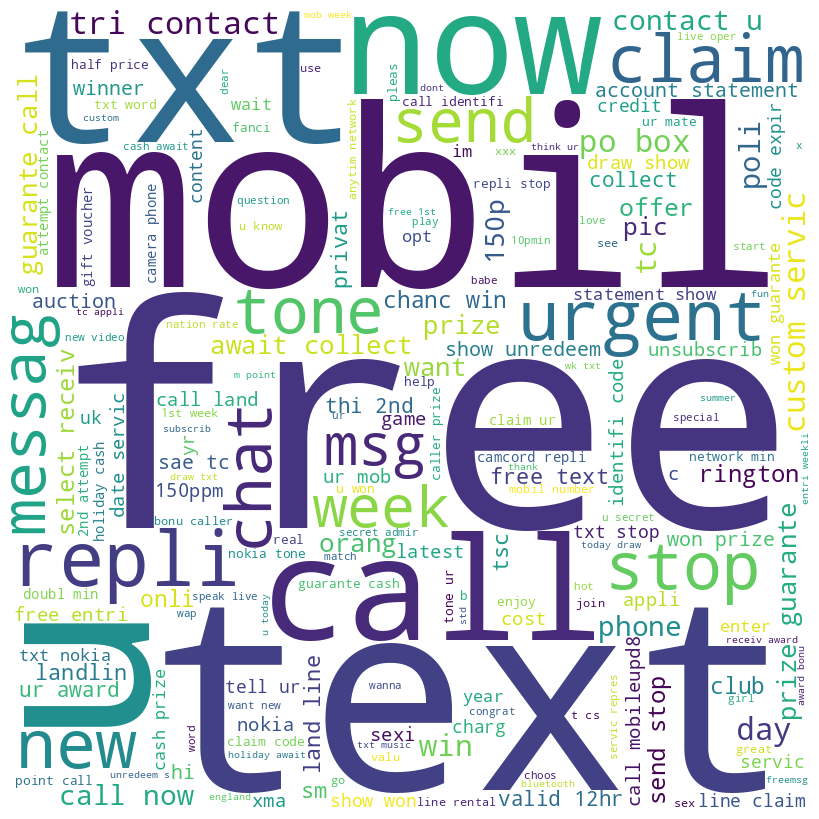

In [15]:
#Preprocessing

stop_words = set(ENGLISH_STOP_WORDS)

# Filter out stop words
def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in stop_words])

df['message'] = df['message'].apply(lambda text: remove_stopwords(text))

# Remove non-alphanumeric characters and extra spaces
def clean_text(text):
  text = re.sub('[^a-zA-Z0-9\s]', '', text)
  text = re.sub('\s+', ' ', text).strip()
  return text

df['message'] = df['message'].apply(lambda text: clean_text(text))

# Stemming
stemmer = PorterStemmer()
def stem_words(text):
  return " ".join([stemmer.stem(word) for word in text.split()])

df['message'] = df['message'].apply(lambda text: stem_words(text))

# Most frequent spam words
spam_words = " ".join(df[df['label'] == 1]['message'].tolist())
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(spam_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Data Preprocessing and Feature Engineering



In [16]:
stop_words = set(ENGLISH_STOP_WORDS)
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [17]:
def preprocess_text(text):
    text = text.lower()
    # Extract alphabetic words
    tokens = re.findall(r'\b[a-z]+\b', text)
    cleaned_tokens = []
    for token in tokens:
        if token not in stop_words:
            stemmed = stemmer.stem(token)
            lemmatized = lemmatizer.lemmatize(stemmed)
            cleaned_tokens.append(lemmatized)
    return ' '.join(cleaned_tokens)

In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
df['cleaned_message'] = df['message'].apply(preprocess_text)

In [20]:
df['cleaned_message']

,cleaned_message
0,jurong point crazi avail bugi n great world la...
1,ok lar joke wif u oni
2,free entri wkli comp win fa cup final tkt text...
3,u dun say earli hor u c say
4,nah dont think goe usf live
...,...
5567,thi time tri contact u u won pound prize claim...
5568,b esplanad fr home
5569,piti mood soani suggest
5570,guy did bitch act like id buy week gave free


In [21]:
print("Original vs. Cleaned (first 5 rows):")
for idx, row in df.head(5).iterrows():
    print(f"Original: {row['message']}")
    print(f"Cleaned:  {row['cleaned_message']}\n")

Original vs. Cleaned (first 5 rows):
Original: go jurong point crazi avail bugi n great world la e buffet cine got amor wat
Cleaned:  jurong point crazi avail bugi n great world la e buffet cine got amor wat

Original: ok lar joke wif u oni
Cleaned:  ok lar joke wif u oni

Original: free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18
Cleaned:  free entri wkli comp win fa cup final tkt text fa receiv entri questionstd txt ratetc appli

Original: u dun say earli hor u c say
Cleaned:  u dun say earli hor u c say

Original: nah i dont think goe usf live
Cleaned:  nah dont think goe usf live



# Visualisation

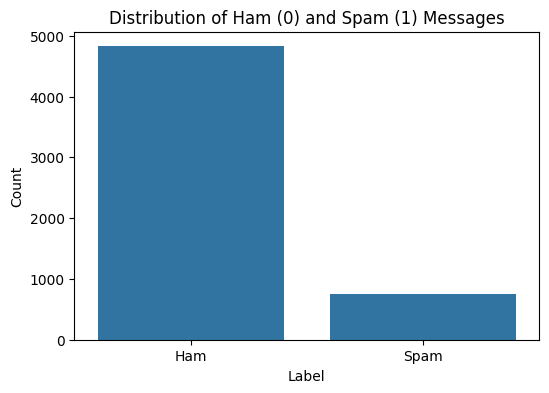

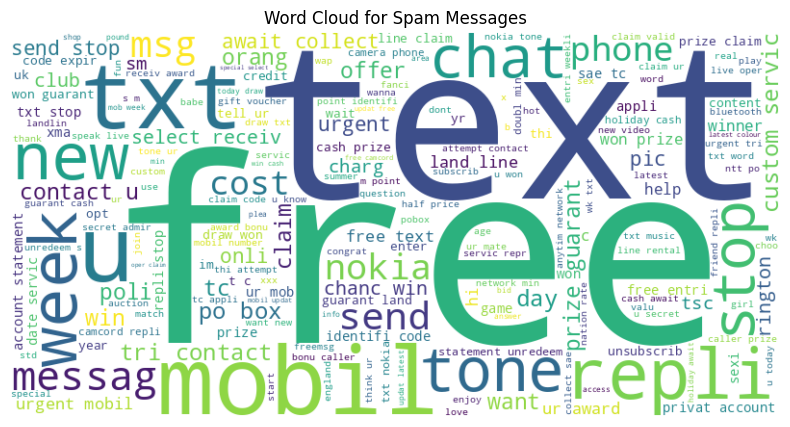

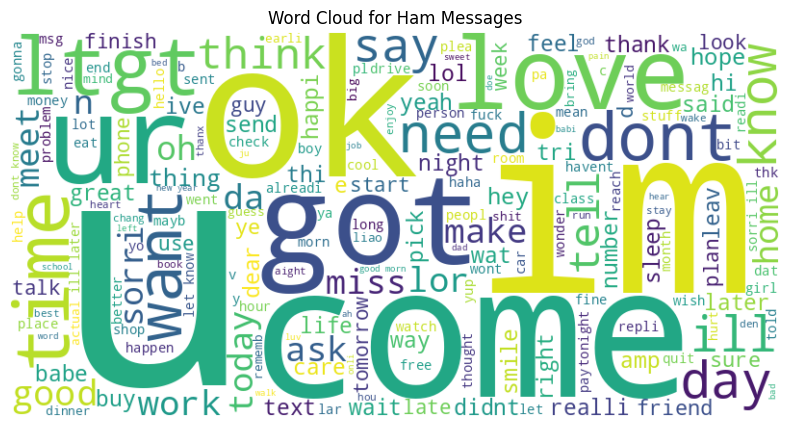

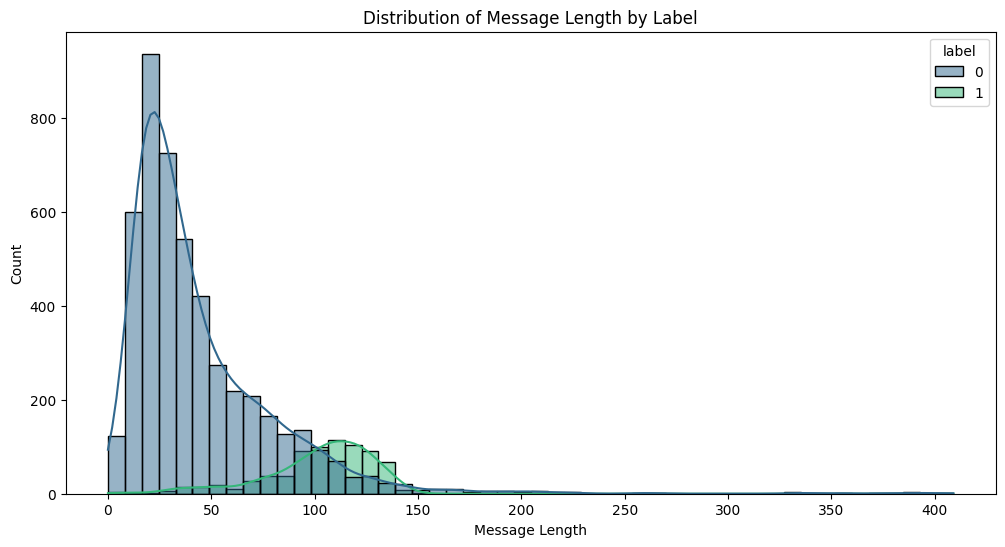

In [22]:
# Distribution of Ham vs. Spam
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Ham (0) and Spam (1) Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

# Word Cloud for Spam Messages
spam_messages = ' '.join(df[df['label'] == 1]['cleaned_message'])
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

# Word Cloud for Ham Messages
ham_messages = ' '.join(df[df['label'] == 0]['cleaned_message'])
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_messages)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()

# Message Length Analysis
df['message_length'] = df['message'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='message_length', hue='label', kde=True, palette='viridis', bins=50)
plt.title('Distribution of Message Length by Label')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

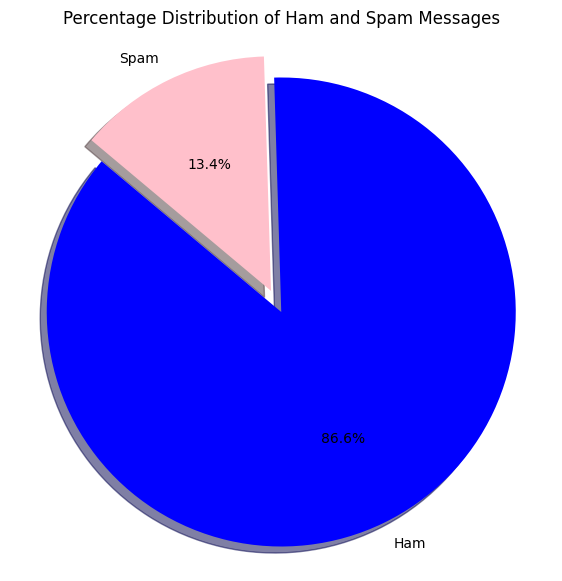

In [23]:
# Percentage of Ham vs. Spam
label_counts = df['label'].value_counts()
labels = ['Ham', 'Spam']
colors = ['blue', 'pink']
explode = (0.1, 0)  # explode the spam slice slightly

plt.figure(figsize=(7, 7))
plt.pie(label_counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage Distribution of Ham and Spam Messages')
plt.axis('equal')
plt.show()

Train Test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_message'], df['label'],
    test_size=0.2, random_state=42, stratify=df['label']
)

In [25]:

vectorizers = {
    'BOW_Uni': CountVectorizer(ngram_range=(1, 1), stop_words='english', max_features=5000),
    'BOW_Ngram': CountVectorizer(ngram_range=(1, 2), stop_words='english', max_features=5000),
    'TF-IDF': TfidfVectorizer(ngram_range=(1, 1), stop_words='english', max_features=5000)
}

#Models

In [26]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                              scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [27]:

results = {vec_name: {} for vec_name in vectorizers}

for vec_name, vec in vectorizers.items():
    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)
    for model_name, model in models.items():
        model.fit(X_train_vec, y_train)
        preds = model.predict(X_test_vec)
        results[vec_name][model_name] = accuracy_score(y_test, preds)

results_df = pd.DataFrame(results).T  # Temporarily have vectorizers as rows
results_df = results_df.T            # Now models are rows, vectorizers are columns
results_df = results_df.sort_index()

print("\n=== Model Accuracies by Vectorization Method ===")
display(results_df)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== Model Accuracies by Vectorization Method ===


,BOW_Uni,BOW_Ngram,TF-IDF
AdaBoost,0.909417,0.909417,0.909417
Decision Tree,0.946188,0.946188,0.945291
Gradient Boosting,0.956951,0.955157,0.952466
KNN,0.921973,0.920179,0.922870
Logistic Regression,0.974888,0.979372,0.971300
Naive Bayes,0.974888,0.978475,0.964126
Random Forest,0.968610,0.972197,0.973094
XGBoost,0.969507,0.971300,0.968610


In [28]:
results_df = pd.DataFrame(results).T
results_df = results_df.T
results_df = results_df.sort_index()


In [29]:
print("\n=== Model Accuracies by Vectorization Method ===")
display(results_df)


=== Model Accuracies by Vectorization Method ===


,BOW_Uni,BOW_Ngram,TF-IDF
AdaBoost,0.909417,0.909417,0.909417
Decision Tree,0.946188,0.946188,0.945291
Gradient Boosting,0.956951,0.955157,0.952466
KNN,0.921973,0.920179,0.922870
Logistic Regression,0.974888,0.979372,0.971300
Naive Bayes,0.974888,0.978475,0.964126
Random Forest,0.968610,0.972197,0.973094
XGBoost,0.969507,0.971300,0.968610


In [30]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                              scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}

In [31]:
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)
    acc = accuracy_score(y_test, preds)
    results[name] = acc





/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [32]:
#Display results in a table
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print("=== Classical ML Results ===")
print(results_df)

=== Classical ML Results ===
                 Model  Accuracy
4        Random Forest  0.973094
0  Logistic Regression  0.971300
6              XGBoost  0.968610
1          Naive Bayes  0.964126
7    Gradient Boosting  0.953363
2        Decision Tree  0.941704
3                  KNN  0.922870
5             AdaBoost  0.909417



# Plot accuracies

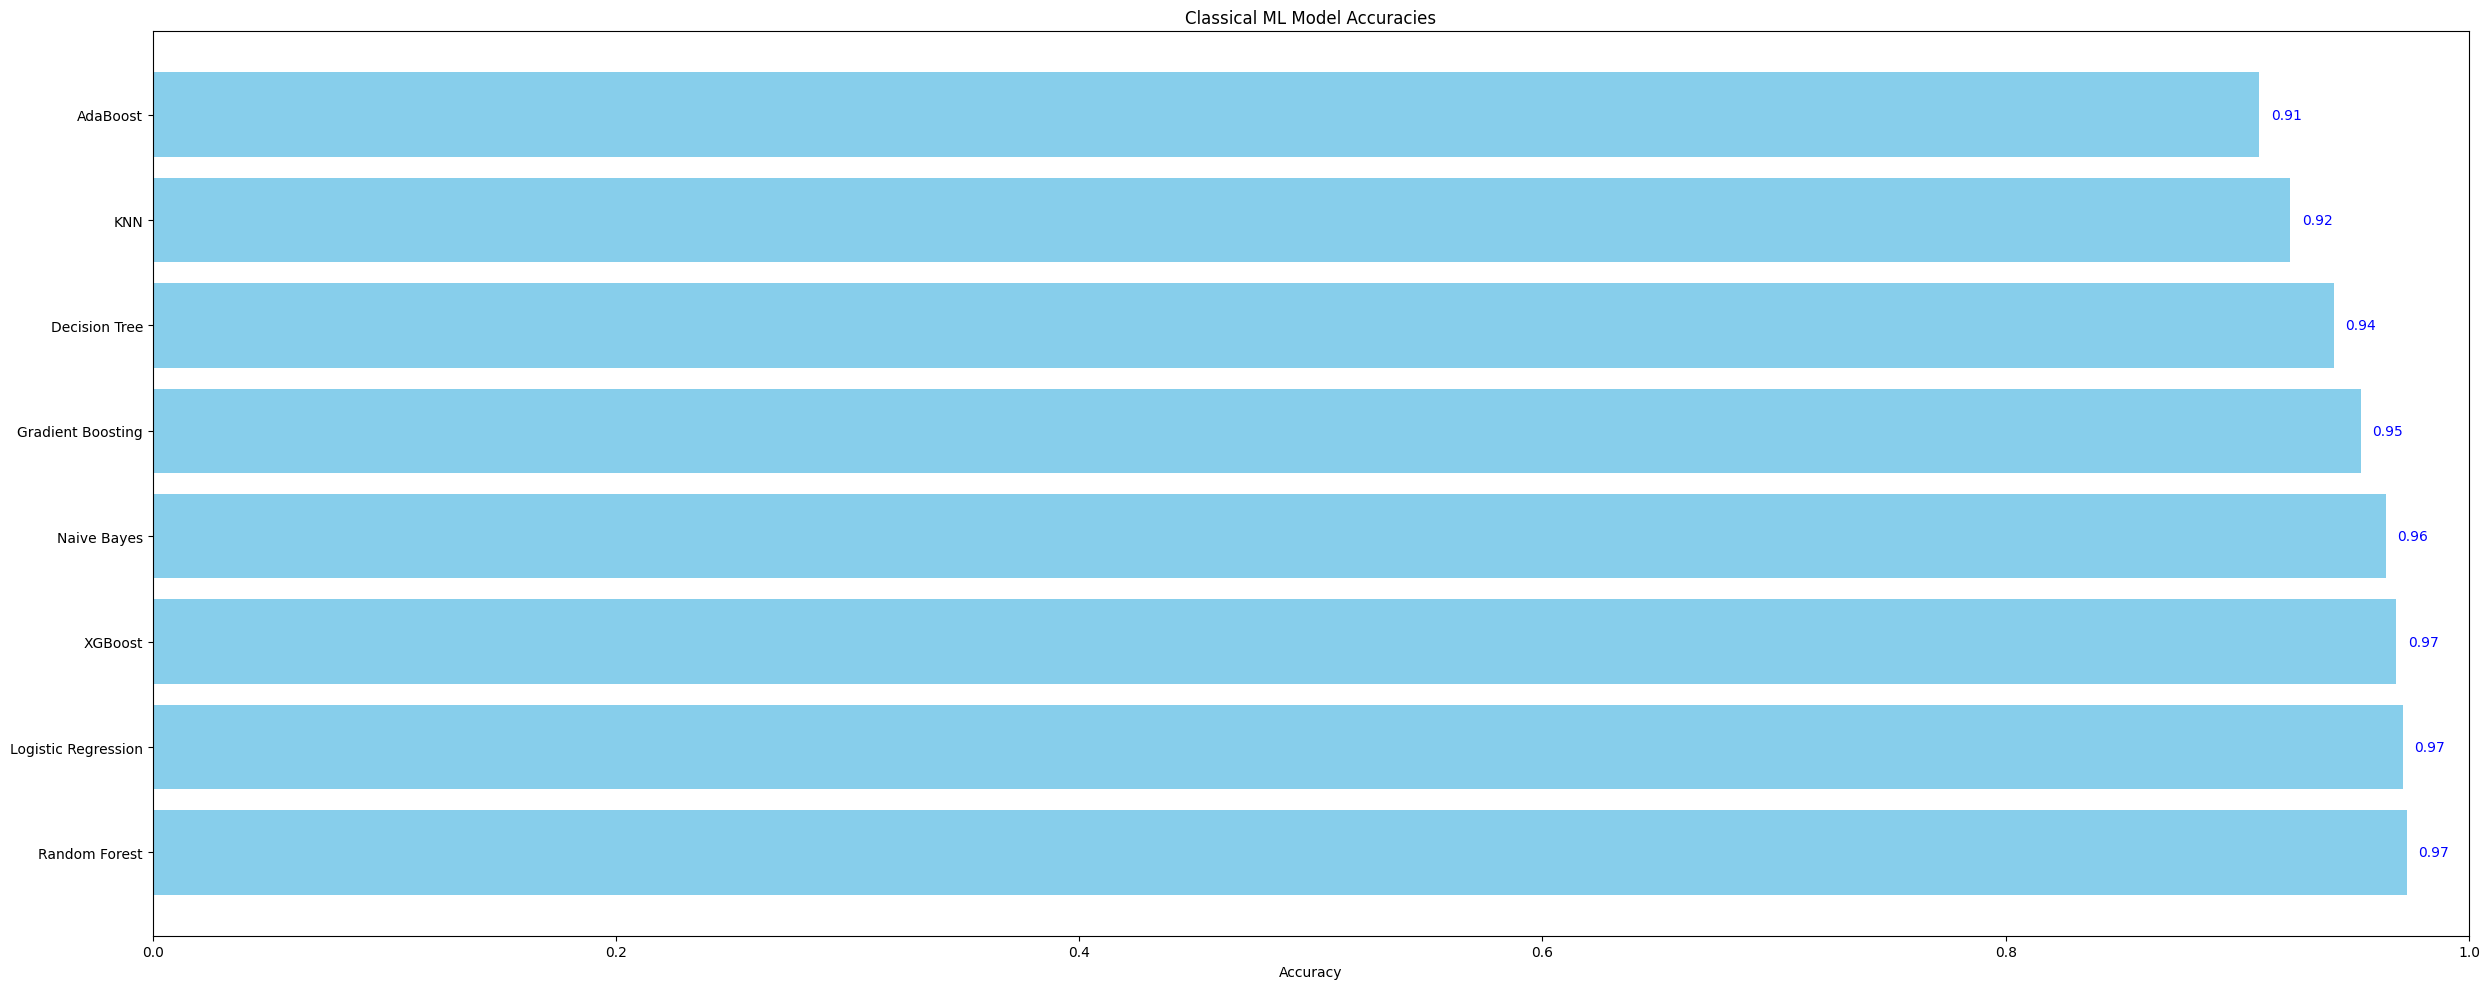

In [33]:
plt.figure(figsize=(25, 10))
plt.barh(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classical ML Model Accuracies')
plt.xlim(0, 1)
for i, v in enumerate(results_df['Accuracy']):
    plt.text(v + 0.005, i, f"{v:.2f}", color='blue', va='center')
plt.tight_layout()
plt.show()

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print("\n=== Model Performance (Precision, Recall, F1-score) ===")
performance_results = {vec_name: {} for vec_name in vectorizers}

for vec_name, vec in vectorizers.items():
    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)
    print(f"\n--- Vectorizer: {vec_name} ---")
    for model_name, model in models.items():
        model.fit(X_train_vec, y_train)
        preds = model.predict(X_test_vec)
        precision = precision_score(y_test, preds)
        recall = recall_score(y_test, preds)
        f1 = f1_score(y_test, preds)
        performance_results[vec_name][model_name] = {'Precision': precision, 'Recall': recall, 'F1-score': f1}
        print(f"  {model_name}:")
        print(f"    Precision: {precision:.4f}")
        print(f"    Recall:    {recall:.4f}")
        print(f"    F1-score:  {f1:.4f}")




=== Model Performance (Precision, Recall, F1-score) ===

--- Vectorizer: BOW_Uni ---
  Logistic Regression:
    Precision: 0.9231
    Recall:    0.8859
    F1-score:  0.9041
  Naive Bayes:
    Precision: 0.9291
    Recall:    0.8792
    F1-score:  0.9034
  Decision Tree:
    Precision: 0.7764
    Recall:    0.8389
    F1-score:  0.8065
  KNN:
    Precision: 0.9559
    Recall:    0.4362
    F1-score:  0.5991
  Random Forest:
    Precision: 0.9752
    Recall:    0.7919
    F1-score:  0.8741
  AdaBoost:
    Precision: 0.9800
    Recall:    0.3289
    F1-score:  0.4925


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:07:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  XGBoost:
    Precision: 0.8966
    Recall:    0.8725
    F1-score:  0.8844
  Gradient Boosting:
    Precision: 0.9444
    Recall:    0.6846
    F1-score:  0.7938

--- Vectorizer: BOW_Ngram ---
  Logistic Regression:
    Precision: 0.9632
    Recall:    0.8792
    F1-score:  0.9193
  Naive Bayes:
    Precision: 0.9562
    Recall:    0.8792
    F1-score:  0.9161
  Decision Tree:
    Precision: 0.7821
    Recall:    0.8188
    F1-score:  0.8000
  KNN:
    Precision: 1.0000
    Recall:    0.4027
    F1-score:  0.5742
  Random Forest:
    Precision: 0.9918
    Recall:    0.8121
    F1-score:  0.8930
  AdaBoost:
    Precision: 0.9800
    Recall:    0.3289
    F1-score:  0.4925


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:07:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  XGBoost:
    Precision: 0.9034
    Recall:    0.8792
    F1-score:  0.8912
  Gradient Boosting:
    Precision: 0.9623
    Recall:    0.6846
    F1-score:  0.8000

--- Vectorizer: TF-IDF ---
  Logistic Regression:
    Precision: 0.8824
    Recall:    0.9060
    F1-score:  0.8940
  Naive Bayes:
    Precision: 1.0000
    Recall:    0.7315
    F1-score:  0.8450
  Decision Tree:
    Precision: 0.7885
    Recall:    0.8255
    F1-score:  0.8066
  KNN:
    Precision: 1.0000
    Recall:    0.4228
    F1-score:  0.5943
  Random Forest:
    Precision: 0.9917
    Recall:    0.8054
    F1-score:  0.8889
  AdaBoost:
    Precision: 0.9800
    Recall:    0.3289
    F1-score:  0.4925


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  XGBoost:
    Precision: 0.8904
    Recall:    0.8725
    F1-score:  0.8814
  Gradient Boosting:
    Precision: 0.9623
    Recall:    0.6846
    F1-score:  0.8000


In [35]:
# Convert the results dictionary to a DataFrame
performance_df = pd.DataFrame.from_dict({(i, j): performance_results[i][j]
                           for i in performance_results.keys()
                           for j in performance_results[i].keys()},
                          orient='index')

# Rename columns for clarity
performance_df.index.names = ['Vectorizer', 'Model']

# Save the performance results to a CSV file
performance_df.to_csv('model_performance_results.csv')

print("\nModel performance details saved to 'model_performance_results.csv'")



Model performance details saved to 'model_performance_results.csv'


#  Deep Learning Models (RNN, LSTM, Bidirectional LSTM, GRU, Stacked)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



=== After including Deep Learning models ===
                  Model  Accuracy
10   Bidirectional LSTM  0.975785
4         Random Forest  0.973094
0   Logistic Regression  0.971300
6               XGBoost  0.968610
1           Naive Bayes  0.964126
8                   RNN  0.958744
7     Gradient Boosting  0.953363
2         Decision Tree  0.941704
3                   KNN  0.922870
5              AdaBoost  0.909417
9                  LSTM  0.866368
11                  GRU  0.866368
12         Stacked LSTM  0.866368
13          Stacked GRU  0.866368


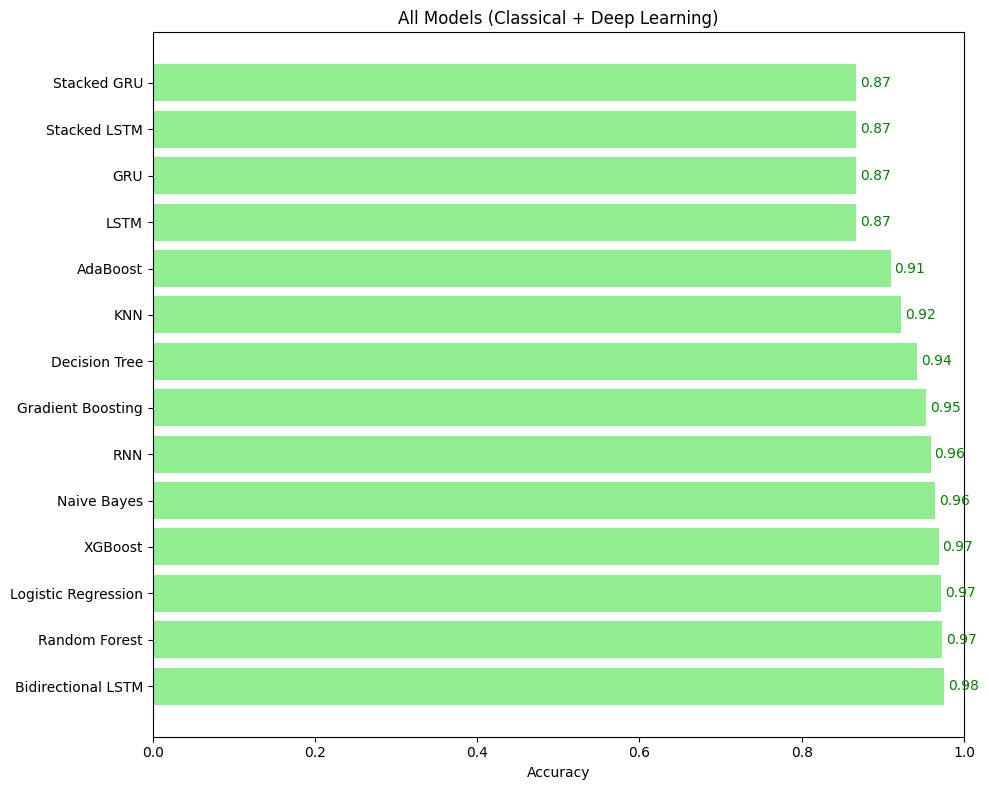

In [36]:
try:
    import tensorflow as tf
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Bidirectional

    # Prepare text sequences for deep learning
    tokenizer_dl = Tokenizer(num_words=10000, oov_token="<OOV>")
    tokenizer_dl.fit_on_texts(X_train)
    X_train_seq = tokenizer_dl.texts_to_sequences(X_train)
    X_test_seq = tokenizer_dl.texts_to_sequences(X_test)
    max_len = 100
    X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
    X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

    vocab_size = 10000
    embed_dim = 16

    def train_dl_model(model_builder, name):
        model = model_builder()
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(X_train_pad, y_train, epochs=3, batch_size=32, validation_split=0.1, verbose=0)
        loss, acc = model.evaluate(X_test_pad, y_test, verbose=0)
        results[name] = acc

    # Define DL architectures
    def rnn_model():
        m = Sequential([
            Embedding(vocab_size, embed_dim, input_length=max_len),
            SimpleRNN(64),
            Dense(1, activation='sigmoid')
        ])
        return m

    def lstm_model():
        m = Sequential([
            Embedding(vocab_size, embed_dim, input_length=max_len),
            LSTM(64),
            Dense(1, activation='sigmoid')
        ])
        return m

    def bi_lstm_model():
        m = Sequential([
            Embedding(vocab_size, embed_dim, input_length=max_len),
            Bidirectional(LSTM(64)),
            Dense(1, activation='sigmoid')
        ])
        return m

    def gru_model():
        m = Sequential([
            Embedding(vocab_size, embed_dim, input_length=max_len),
            GRU(64),
            Dense(1, activation='sigmoid')
        ])
        return m

    def stacked_lstm_model():
        m = Sequential([
            Embedding(vocab_size, embed_dim, input_length=max_len),
            LSTM(64, return_sequences=True),
            LSTM(32),
            Dense(1, activation='sigmoid')
        ])
        return m

    def stacked_gru_model():
        m = Sequential([
            Embedding(vocab_size, embed_dim, input_length=max_len),
            GRU(64, return_sequences=True),
            GRU(32),
            Dense(1, activation='sigmoid')
        ])
        return m

    # Train and evaluate deep learning models
    train_dl_model(rnn_model, 'RNN')
    train_dl_model(lstm_model, 'LSTM')
    train_dl_model(bi_lstm_model, 'Bidirectional LSTM')
    train_dl_model(gru_model, 'GRU')
    train_dl_model(stacked_lstm_model, 'Stacked LSTM')
    train_dl_model(stacked_gru_model, 'Stacked GRU')

    # Update and show results
    results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
    print("\n=== After including Deep Learning models ===")
    print(results_df)

    # Plot including DL models
    plt.figure(figsize=(10, 8))
    plt.barh(results_df['Model'], results_df['Accuracy'], color='lightgreen')
    plt.xlabel('Accuracy')
    plt.title('All Models (Classical + Deep Learning)')
    plt.xlim(0, 1)
    for i, v in enumerate(results_df['Accuracy']):
        plt.text(v + 0.005, i, f"{v:.2f}", color='green', va='center')
    plt.tight_layout()
    plt.show()

except ImportError:
    print("TensorFlow/Keras not installed. Skipping deep learning section.")

# Pretrained Model

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



=== After including Pretrained DistilBERT (placeholder) ===
                  Model  Accuracy
10   Bidirectional LSTM  0.975785
4         Random Forest  0.973094
0   Logistic Regression  0.971300
6               XGBoost  0.968610
1           Naive Bayes  0.964126
8                   RNN  0.958744
7     Gradient Boosting  0.953363
2         Decision Tree  0.941704
3                   KNN  0.922870
5              AdaBoost  0.909417
9                  LSTM  0.866368
11                  GRU  0.866368
12         Stacked LSTM  0.866368
13          Stacked GRU  0.866368
14           DistilBERT  0.802691


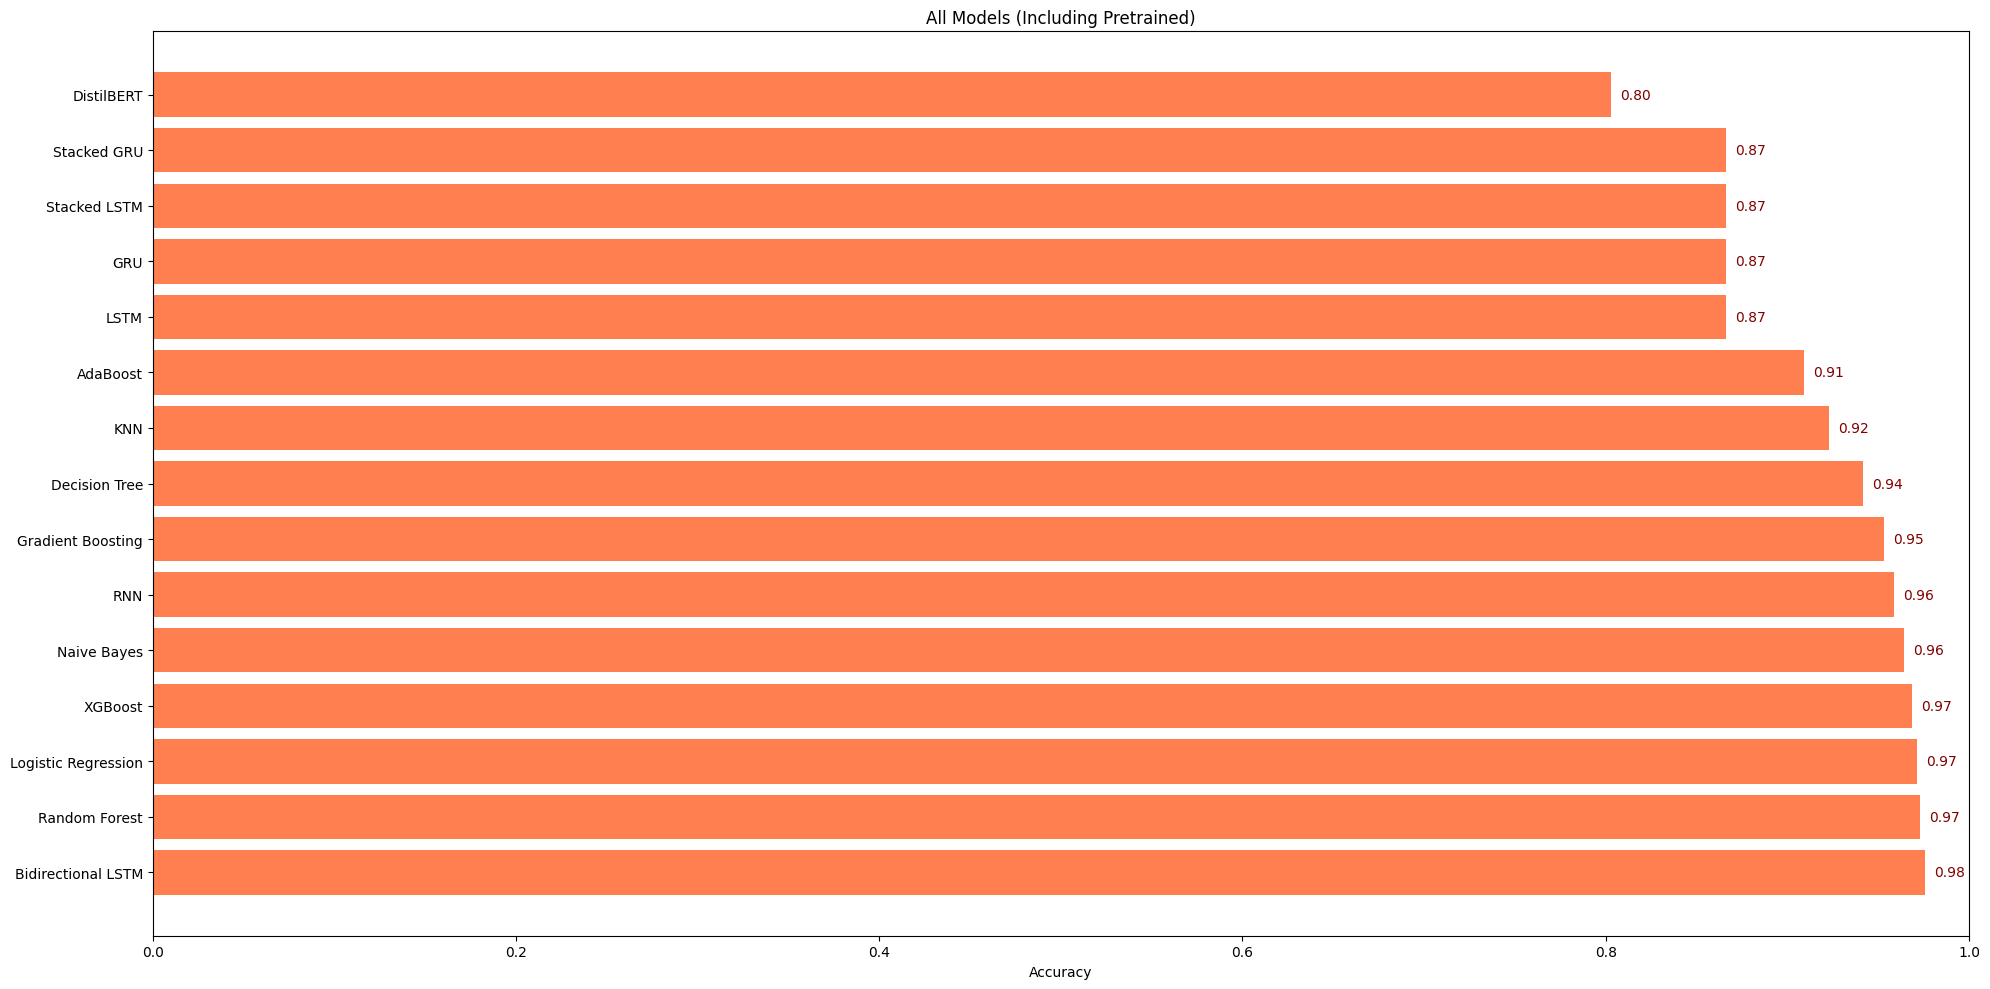

In [37]:
try:
    from transformers import pipeline


    spam_pipeline = pipeline("text-classification", model="distilbert-base-uncased", tokenizer="distilbert-base-uncased")

    bert_preds = []
    for msg in X_test:
        pred = spam_pipeline(msg[:512])  # truncate long messages
        # The outputs here are generic labels (e.g. 'LABEL_0' / 'LABEL_1'),
        # so you’d map them to ham/spam according to your fine-tuned model’s conventions.
        label = 1 if pred[0]['label'] in ['LABEL_1', 'SPAM'] else 0
        bert_preds.append(label)

    bert_acc = accuracy_score(y_test, bert_preds)
    results['DistilBERT'] = bert_acc

    results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
    print("\n=== After including Pretrained DistilBERT (placeholder) ===")
    print(results_df)

    plt.figure(figsize=(20, 10))
    plt.barh(results_df['Model'], results_df['Accuracy'], color='coral')
    plt.xlabel('Accuracy')
    plt.title('All Models (Including Pretrained)')
    plt.xlim(0, 1)
    for i, v in enumerate(results_df['Accuracy']):
        plt.text(v + 0.005, i, f"{v:.2f}", color='maroon', va='center')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Transformers pipeline unavailable or failed. Skipping pretrained models.")
    print(f"Error: {e}")


In [39]:
import pickle

# Create a dictionary to store all relevant model details
all_model_details = {
    'accuracies': results,
    'classical_performance': performance_results
}

# Define the filename for the pickle file
filename = 'all_model_details.pkl'

# Save the dictionary to a pickle file
with open(filename, 'wb') as f:
    pickle.dump(all_model_details, f)

print(f"All model details saved to {filename}")



All model details saved to all_model_details.pkl


# Hypertune Model


--- Tuning Logistic Regression Tuned using GridSearchCV ---
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters for Logistic Regression Tuned: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation accuracy for Logistic Regression Tuned: 0.9785
Test set accuracy for tuned Logistic Regression Tuned: 0.9758

--- Tuning Random Forest Tuned using GridSearchCV ---
Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters for Random Forest Tuned: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest Tuned: 0.9782
Test set accuracy for tuned Random Forest Tuned: 0.9803

--- Tuning XGBoost Tuned using RandomizedSearchCV ---
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost Tuned: {'colsample_bytree': np.float64(0.8032795106962874), 'gamma': np.float64(0.34790640339544093), 'learning_rate': np.float64(0.18167176096274398), 'max_depth': 6, 'n_estimators': 196, 'reg_alpha': np.float64(0.7111495324380178), 'reg_lambda': np.float64(0.8095010461397154), 'subsample': np.float64(0.7394663949166917)}
Best cross-validation accuracy for XGBoost Tuned: 0.9659
Test set accuracy for tuned XGBoost Tuned: 0.9650

=== Model Accuracies after Hyperparameter Tuning ===
                        Model  Accuracy
16        Random Forest Tuned  0.980269
10         Bidirectional LSTM  0.975785
15  Logistic Regression Tuned  0.975785
4               Random Forest  0.973094
0         Logistic Regression  0.971300
6                     XGBoost  0.968610
17              XGBoost Tuned  0.965022
1                 Naive Bayes  0.964126
8                         RNN  0.958744
7           Gradient Boosting  0.953363
2               Decision Tree  0.941704
3     

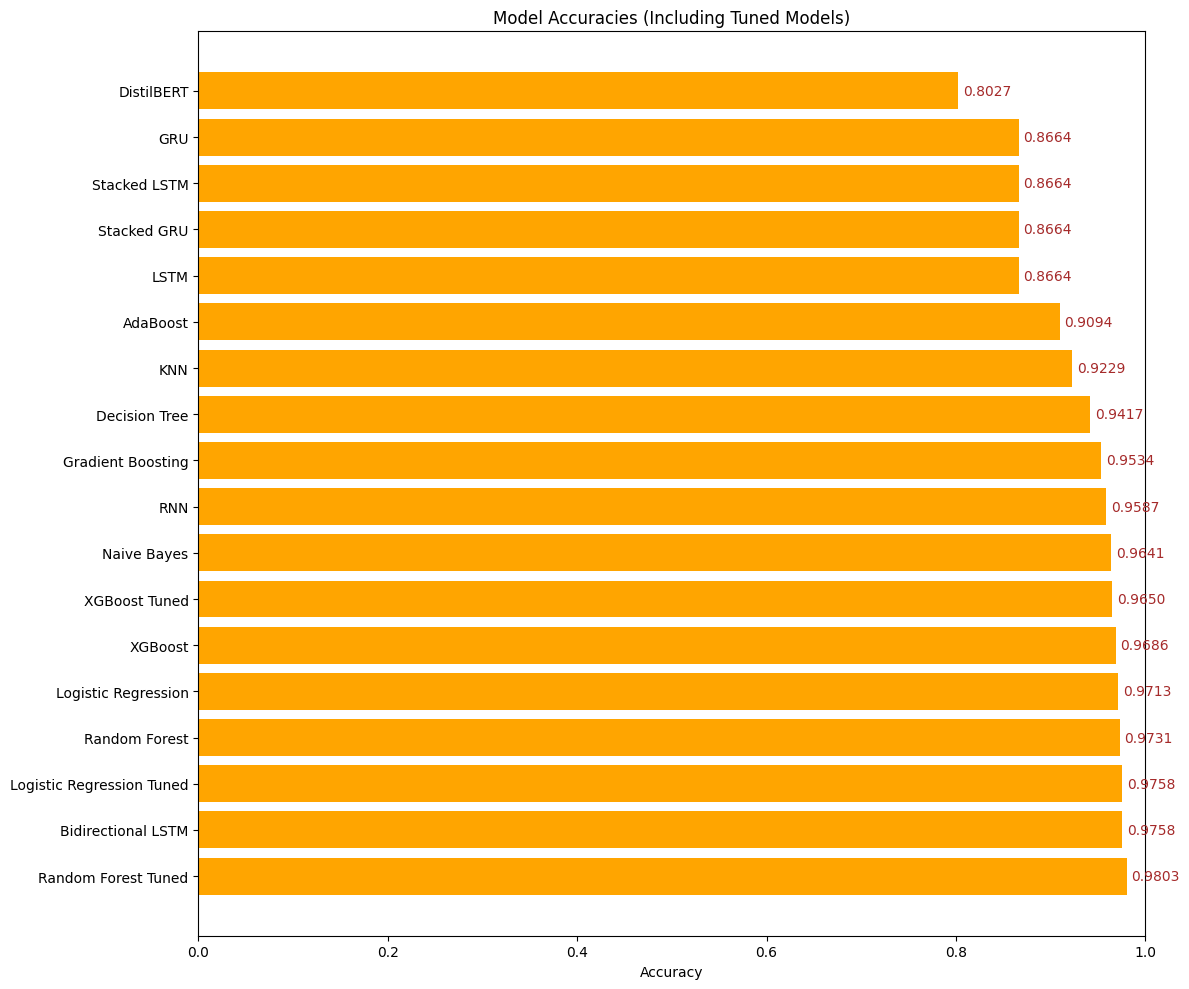

In [40]:
# hypertune model

vectorizer_for_tuning = TfidfVectorizer(ngram_range=(1, 1), stop_words='english', max_features=5000)
X_train_tuned = vectorizer_for_tuning.fit_transform(X_train)
X_test_tuned = vectorizer_for_tuning.transform(X_test)


# Example hyperparameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None]
}

# Example hyperparameter grid for RandomForestClassifier
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# Example hyperparameter distributions for RandomizedSearchCV (for XGBoost)
xgb_param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}


# Select models for tuning and their respective grids
tuning_models = {
    'Logistic Regression Tuned': (LogisticRegression(max_iter=1000), lr_param_grid, 'GridSearchCV'),
    'Random Forest Tuned': (RandomForestClassifier(), rf_param_grid, 'GridSearchCV'),
    'XGBoost Tuned': (XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()), xgb_param_dist, 'RandomizedSearchCV')
}

tuned_results = {}

for name, (model, params, search_method) in tuning_models.items():
    print(f"\n--- Tuning {name} using {search_method} ---")

    if search_method == 'GridSearchCV':
        search = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
    elif search_method == 'RandomizedSearchCV':
        search = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
    else:
        print(f"Unknown search method: {search_method}. Skipping.")
        continue

    search.fit(X_train_tuned, y_train)

    print(f"Best parameters for {name}: {search.best_params_}")
    print(f"Best cross-validation accuracy for {name}: {search.best_score_:.4f}")

    # Evaluate the best model on the test set
    best_model = search.best_estimator_
    preds = best_model.predict(X_test_tuned)
    test_acc = accuracy_score(y_test, preds)
    tuned_results[name] = test_acc

    print(f"Test set accuracy for tuned {name}: {test_acc:.4f}")

# Add tuned model results to the existing results dictionary
results.update(tuned_results)

# Display updated results
results_df_tuned = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print("\n=== Model Accuracies after Hyperparameter Tuning ===")
print(results_df_tuned)

# Plot results including tuned models
plt.figure(figsize=(12, 10))
plt.barh(results_df_tuned['Model'], results_df_tuned['Accuracy'], color='orange')
plt.xlabel('Accuracy')
plt.title('Model Accuracies (Including Tuned Models)')
plt.xlim(0, 1)
for i, v in enumerate(results_df_tuned['Accuracy']):
    plt.text(v + 0.005, i, f"{v:.4f}", color='brown', va='center')
plt.tight_layout()
plt.show()


In [ ]:
# If you need to save the updated results including BERT:
# Ensure 'all_model_details' dictionary is updated
# all_model_details['accuracies'] = results # Update with the new results dictionary
# all_model_details['classical_performance'] = performance_results # Update performance if BERT was added

# Define the filename for the pickle file
filename = 'all_model_details_updated.pkl' # Use a new name or overwrite

Save the updated dictionary to a pickle file
with open(filename, 'wb') as f:
    pickle.dump(all_model_details, f)

 print(f"Updated model details saved to {filename}")

# Optional: You can download the file if you are in Colab
# from google.colab import files
# files.download(filename)

In [42]:


!pip install keras-tuner

import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, GRU
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare data for Keras (already done in preceding code)
# X_train, X_test, y_train, y_test are already defined
# tokenizer_dl, X_train_pad, X_test_pad, max_len, vocab_size, embed_dim are already defined

# Define the KerasTuner Model
def build_model(hp):
    model = Sequential()
    # Tune the number of units in the Embedding layer
    hp_embed_dim = hp.Int('embedding_dim', min_value=16, max_value=128, step=16)
    model.add(Embedding(vocab_size, hp_embed_dim, input_length=max_len))

    # Tune the type of RNN layer and number of units
    rnn_layer_type = hp.Choice('rnn_layer_type', values=['lstm', 'gru', 'bidirectional_lstm'])

    if rnn_layer_type == 'lstm':
        hp_lstm_units = hp.Int('lstm_units', min_value=32, max_value=128, step=32)
        model.add(LSTM(hp_lstm_units))
    elif rnn_layer_type == 'gru':
        hp_gru_units = hp.Int('gru_units', min_value=32, max_value=128, step=32)
        model.add(GRU(hp_gru_units))
    elif rnn_layer_type == 'bidirectional_lstm':
        hp_bi_lstm_units = hp.Int('bidirectional_lstm_units', min_value=32, max_value=128, step=32)
        model.add(Bidirectional(LSTM(hp_bi_lstm_units)))

    # Tune the number of units in the Dense layer
    hp_dense_units = hp.Int('dense_units', min_value=16, max_value=64, step=16)
    model.add(Dense(hp_dense_units, activation='relu')) # Added a dense layer before output

    model.add(Dense(1, activation='sigmoid'))

    # Tune the optimizer
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    optimizer = hp_optimizer
    if hp_optimizer == 'adam':
        hp_learning_rate_adam = hp.Float('learning_rate_adam', min_value=1e-4, max_value=1e-2, sampling='LOG')
        optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate_adam)
    elif hp_optimizer == 'rmsprop':
        hp_learning_rate_rmsprop = hp.Float('learning_rate_rmsprop', min_value=1e-4, max_value=1e-2, sampling='LOG')
        optimizer = keras.optimizers.RMSprop(learning_rate=hp_learning_rate_rmsprop)
    elif hp_optimizer == 'sgd':
        hp_learning_rate_sgd = hp.Float('learning_rate_sgd', min_value=1e-4, max_value=1e-2, sampling='LOG')
        optimizer = keras.optimizers.SGD(learning_rate=hp_learning_rate_sgd)


    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return model

# Initialize the KerasTuner Tuner (e.g., RandomSearch or Hyperband)
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='spam_classification_tuning')

# Define a callback for early stopping to prevent overfitting
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Run the hyperparameter search
# Use a validation split to monitor performance during tuning
tuner.search(X_train_pad, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the Embedding layer is {best_hps.get('embedding_dim')}.
The optimal RNN layer type is {best_hps.get('rnn_layer_type')}.
The optimal number of units in the Dense layer is {best_hps.get('dense_units')}.
The optimal optimizer is {best_hps.get('optimizer')}.
""")

# Build the model with the optimal hyperparameters and train it on the entire training dataset
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_pad, y_train, epochs=10, validation_split=0.2)

# Evaluate the best model on the test set
eval_result = model.evaluate(X_test_pad, y_test)
print("[test loss, test accuracy]:", eval_result)

# You can also get the best model directly
best_model_kt = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model from the tuner on the test set
eval_result_best_model = best_model_kt.evaluate(X_test_pad, y_test)
print("[best model test loss, best model test accuracy]:", eval_result_best_model)

# Add the tuned Keras model's accuracy to the results dictionary
# Assuming results dictionary is available from the previous code blocks
results['Tuned Keras DL'] = eval_result_best_model[1] # index 1 is accuracy

# Display updated results including the tuned Keras model
results_df_final = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print("\n=== Model Accuracies after KerasTuner Tuning ===")
print(results_df_final)




Trial 30 Complete [00h 00m 11s]
val_accuracy: 0.8430493474006653

Best val_accuracy So Far: 0.9809417128562927
Total elapsed time: 00h 05m 06s

The optimal number of units in the Embedding layer is 96.
The optimal RNN layer type is bidirectional_lstm.
The optimal number of units in the Dense layer is 32.
The optimal optimizer is adam.

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8441 - loss: 0.5624 - val_accuracy: 0.8430 - val_loss: 0.3920
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8743 - loss: 0.3233 - val_accuracy: 0.8430 - val_loss: 0.3062
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8678 - loss: 0.2620 - val_accuracy: 0.9327 - val_loss: 0.2003
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9687 - loss: 0.1350 - val_accuracy: 0.9652 - val_loss: 0.1161
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9783 - loss: 0.0816 - val_accuracy: 0.9742 - val_loss: 0.0867
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9904 - loss: 0.0450 - val_accuracy: 0.9742 - val_loss: 0.0749
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9926 - loss: 0.0271 - val_accuracy: 0.9675 - val_loss: 0.0973
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9942 - loss: 0.0211 - val_accuracy: 0.978

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9857 - loss: 0.0612
[best model test loss, best model test accuracy]: [0.07535926252603531, 0.9820627570152283]

=== Model Accuracies after KerasTuner Tuning ===
                        Model  Accuracy
19             Tuned Keras DL  0.982063
16        Random Forest Tuned  0.980269
10         Bidirectional LSTM  0.975785
15  Logistic Regression Tuned  0.975785
4               Random Forest  0.973094
0         Logistic Regression  0.971300
6                     XGBoost  0.968610
17              XGBoost Tuned  0.965022
1                 Naive Bayes  0.964126
8                         RNN  0.958744
7           Gradient Boosting  0.953363
2               Decision Tree  0.941704
3                         KNN  0.922870
5                    AdaBoost  0.909417
11                        GRU  0.866368
9                        LSTM  0.866368
12               Stacked LSTM  0.866368
13                Stacked GRU  0.866368
14                 Distil

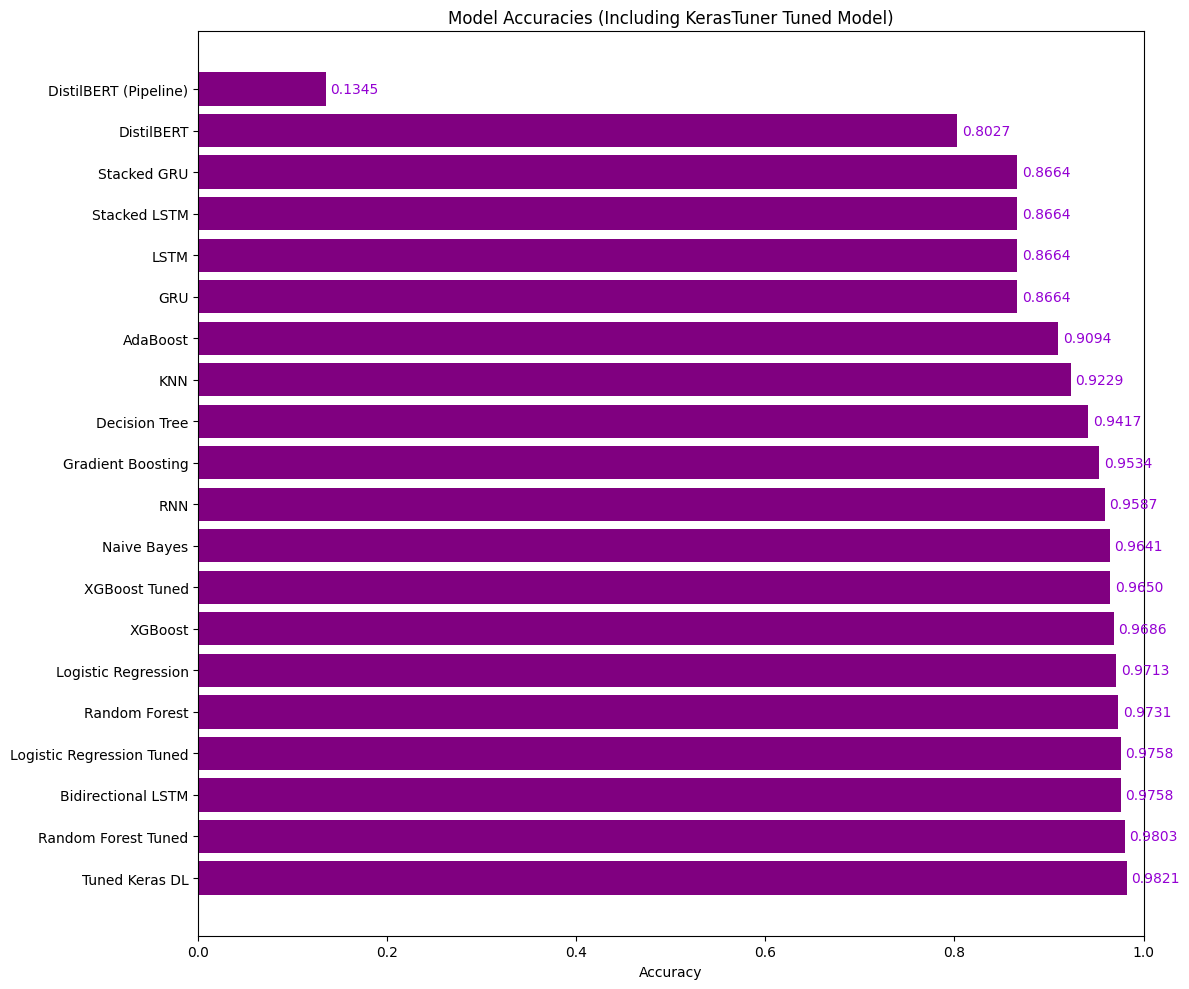

In [43]:
          # Plot results including the tuned Keras model
plt.figure(figsize=(12, 10))
plt.barh(results_df_final['Model'], results_df_final['Accuracy'], color='purple')
plt.xlabel('Accuracy')
plt.title('Model Accuracies (Including KerasTuner Tuned Model)')
plt.xlim(0, 1)
for i, v in enumerate(results_df_final['Accuracy']):
    plt.text(v + 0.005, i, f"{v:.4f}", color='darkviolet', va='center')
plt.tight_layout()
plt.show()


=== Checking for Overfitting (Train vs. Test Accuracy) ===

--- Classical Models (using TF-IDF) ---
Logistic Regression: Train Acc = 0.9904, Test Acc = 0.9713
Naive Bayes: Train Acc = 0.9771, Test Acc = 0.9641
Decision Tree: Train Acc = 0.9998, Test Acc = 0.9489
KNN: Train Acc = 0.9367, Test Acc = 0.9229
Random Forest: Train Acc = 0.9998, Test Acc = 0.9749
AdaBoost: Train Acc = 0.9094, Test Acc = 0.9094


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:03:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: Train Acc = 0.9978, Test Acc = 0.9686
Gradient Boosting: Train Acc = 0.9702, Test Acc = 0.9543

--- Tuned Keras DL Model ---
Tuned Keras DL: Train Acc = 0.9962, Test Acc = 0.9812

--- DistilBERT Model ---
DistilBERT: Train Acc = N/A* (Requires pipeline evaluation setup), Test Acc = 0.8027
*Note: Calculating train accuracy for the pipeline requires evaluating it on the training dataset.

=== Train vs. Test Accuracy Summary ===


,Train Accuracy,Test Accuracy
Tuned Keras DL,0.996186,0.981166
Random Forest,0.999776,0.974888
Logistic Regression,0.990352,0.9713
XGBoost,0.997756,0.96861
Naive Bayes,0.977115,0.964126
Gradient Boosting,0.970159,0.95426
Decision Tree,0.999776,0.948879
KNN,0.936729,0.92287
AdaBoost,0.909356,0.909417
DistilBERT,N/A*,0.802691


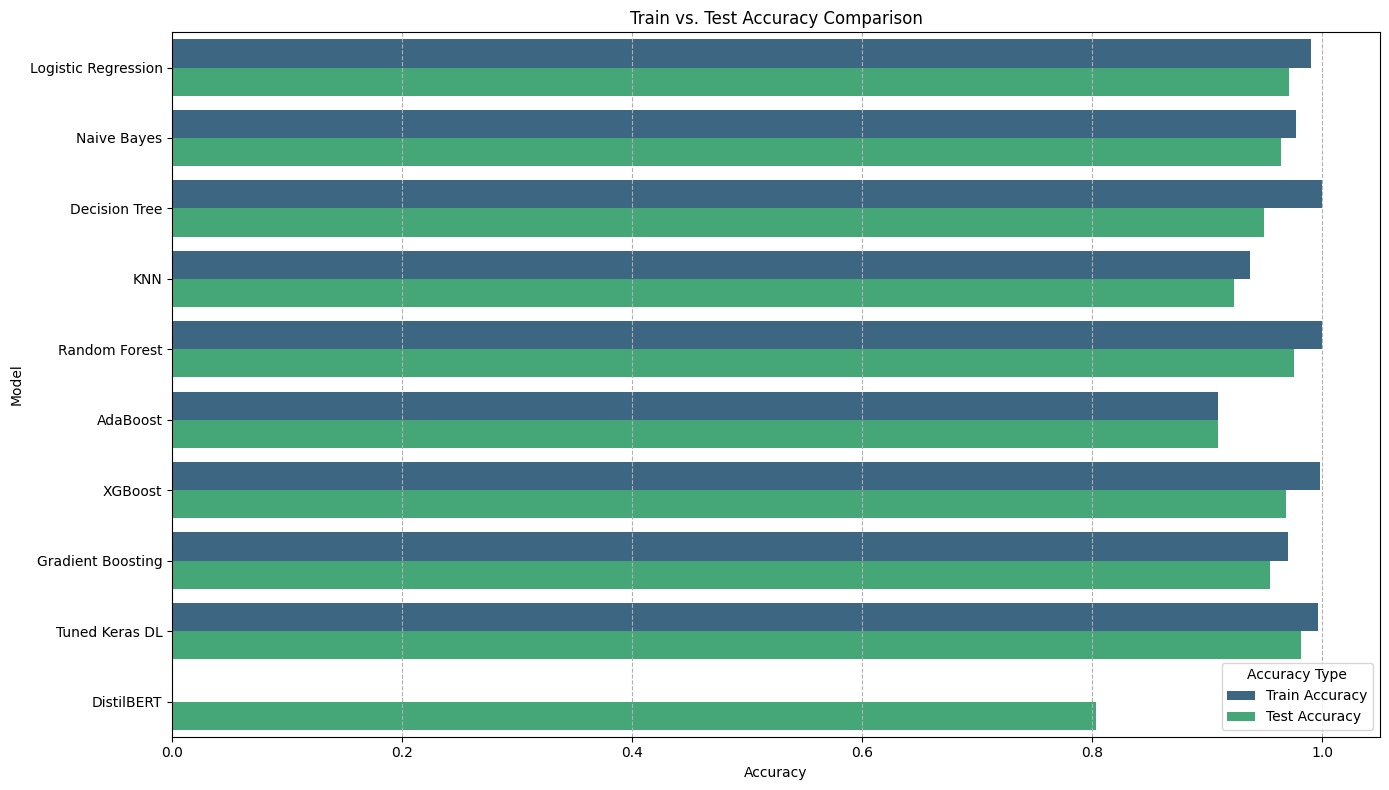


--- Interpreting Overfitting ---
A significant gap between Train Accuracy and Test Accuracy suggests overfitting.
Train Accuracy >> Test Accuracy: The model is performing very well on the data it was trained on but poorly on unseen data.
Train Accuracy ≈ Test Accuracy: The model is generalizing well, indicating good performance on unseen data.
Low Train and Test Accuracy: The model is likely underfitting or not complex enough for the data.

=== Cross-Validation Accuracy Check (using TF-IDF) ===
Logistic Regression: Mean CV Acc (Train) = 0.9760 (+/- 0.0118)
Naive Bayes: Mean CV Acc (Train) = 0.9641 (+/- 0.0154)
Decision Tree: Mean CV Acc (Train) = 0.9495 (+/- 0.0160)
KNN: Mean CV Acc (Train) = 0.9127 (+/- 0.0092)
Random Forest: Mean CV Acc (Train) = 0.9737 (+/- 0.0079)
AdaBoost: Mean CV Acc (Train) = 0.9091 (+/- 0.0121)
XGBoost: Mean CV Acc (Train) = 0.9715 (+/- 0.0125)
Gradient Boosting: Mean CV Acc (Train) = 0.9560 (+/- 0.0132)

=== Cross-Validation Summary ===


,Mean CV Accuracy (Train),CV Std Dev (Train)
Logistic Regression,0.975993,0.005919
Random Forest,0.973749,0.003926
XGBoost,0.971505,0.006255
Naive Bayes,0.964099,0.007719
Gradient Boosting,0.956023,0.006603
Decision Tree,0.949519,0.008022
KNN,0.912720,0.004602
AdaBoost,0.909132,0.006063


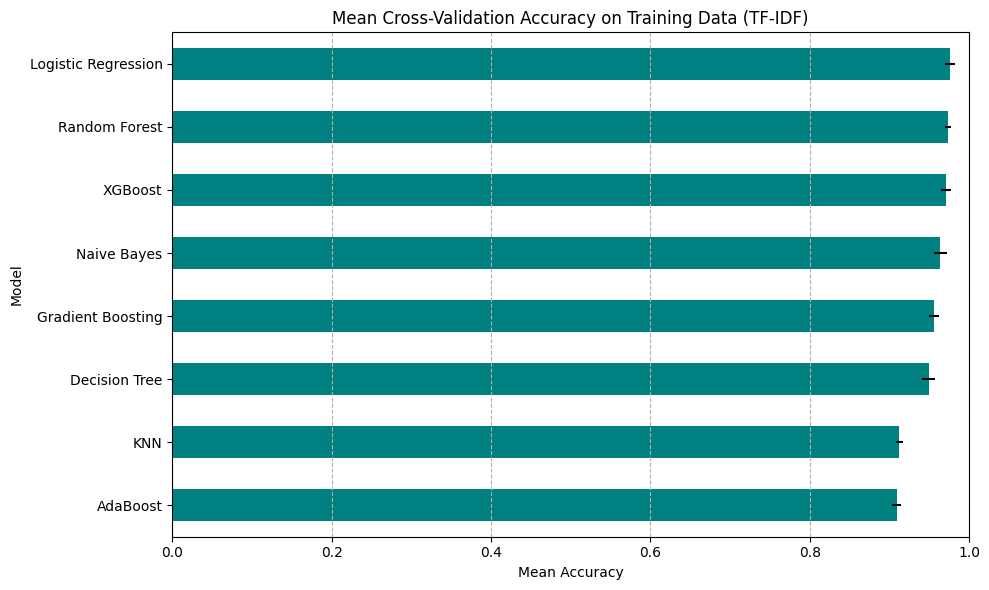


--- Interpreting Cross-Validation ---
Cross-validation provides a more reliable estimate of how the model generalizes to new data *from the same distribution as the training data*.
Comparing Mean CV Accuracy (Train) to Test Accuracy can also indicate overfitting.
If Mean CV Accuracy is significantly higher than Test Accuracy, there might still be some discrepancy between the CV splits and the final test set, or slight data leakage in the CV process.


In [45]:
# check overfitting in all the above models

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

print("\n=== Checking for Overfitting (Train vs. Test Accuracy) ===")

# Store train and test accuracies
overfitting_check = {}

# Function to calculate train and test accuracy
def get_train_test_accuracy(model, X_train_vec, y_train, X_test_vec, y_test, is_dl=False):
    if is_dl:

        history = model.fit(X_train_vec, y_train, epochs=5, batch_size=32, verbose=0) # Train for a few epochs
        train_acc = history.history['accuracy'][-1] # Get accuracy from the last epoch
        _, test_acc = model.evaluate(X_test_vec, y_test, verbose=0)
    else:
        model.fit(X_train_vec, y_train)
        train_acc = model.score(X_train_vec, y_train)
        test_acc = model.score(X_test_vec, y_test)
    return train_acc, test_acc

# Check classical models with their best performing vectorizer (assuming TF-IDF for simplicity)
vectorizer_for_overfitting = TfidfVectorizer(ngram_range=(1, 1), stop_words='english', max_features=5000)
X_train_of = vectorizer_for_overfitting.fit_transform(X_train)
X_test_of = vectorizer_for_overfitting.transform(X_test)

print("\n--- Classical Models (using TF-IDF) ---")
for model_name, model in models.items():
    if 'Tuned' not in model_name: # Exclude explicitly tuned models for this basic check
        try:
            train_acc, test_acc = get_train_test_accuracy(model, X_train_of, y_train, X_test_of, y_test)
            overfitting_check[model_name] = {'Train Accuracy': train_acc, 'Test Accuracy': test_acc}
            print(f"{model_name}: Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")
        except Exception as e:
            print(f"Could not check overfitting for {model_name}: {e}")

# Check the KerasTuner tuned DL model
if 'Tuned Keras DL' in results and 'best_model_kt' in globals() and best_model_kt is not None:
     print("\n--- Tuned Keras DL Model ---")
     try:
         # Use the pad_sequences data for the DL model
         train_acc_dl, test_acc_dl = get_train_test_accuracy(best_model_kt, X_train_pad, y_train, X_test_pad, y_test, is_dl=True)
         overfitting_check['Tuned Keras DL'] = {'Train Accuracy': train_acc_dl, 'Test Accuracy': test_acc_dl}
         print(f"Tuned Keras DL: Train Acc = {train_acc_dl:.4f}, Test Acc = {test_acc_dl:.4f}")
     except Exception as e:
         print(f"Could not check overfitting for Tuned Keras DL: {e}")

# Check the DistilBERT model (if available)
if 'DistilBERT' in results and 'spam_pipeline' in globals():
    print("\n--- DistilBERT Model ---")
    try:

        test_acc_bert = results['DistilBERT']
        overfitting_check['DistilBERT'] = {'Train Accuracy': 'N/A*', 'Test Accuracy': test_acc_bert}
        print(f"DistilBERT: Train Acc = N/A* (Requires pipeline evaluation setup), Test Acc = {test_acc_bert:.4f}")
        print("*Note: Calculating train accuracy for the pipeline requires evaluating it on the training dataset.")
    except Exception as e:
         print(f"Could not check overfitting for DistilBERT: {e}")


# Create a DataFrame for easier viewing
overfitting_df = pd.DataFrame(overfitting_check).T
print("\n=== Train vs. Test Accuracy Summary ===")
display(overfitting_df.sort_values(by='Test Accuracy', ascending=False))

# Visualize Overfitting
if not overfitting_df.empty:
    overfitting_df_melted = overfitting_df.reset_index().melt(id_vars='index', var_name='Accuracy Type', value_name='Accuracy')
    overfitting_df_melted = overfitting_df_melted.rename(columns={'index': 'Model'})
    # Convert non-numeric values to NaN for plotting if necessary (like N/A*)
    overfitting_df_melted['Accuracy'] = pd.to_numeric(overfitting_df_melted['Accuracy'], errors='coerce')

    plt.figure(figsize=(14, 8))
    sns.barplot(x='Accuracy', y='Model', hue='Accuracy Type', data=overfitting_df_melted.dropna(), palette='viridis')
    plt.title('Train vs. Test Accuracy Comparison')
    plt.xlabel('Accuracy')
    plt.ylabel('Model')
    plt.xlim(0, 1.05)
    plt.legend(title='Accuracy Type')
    plt.grid(axis='x', linestyle='--')
    plt.tight_layout()
    plt.show()

    print("\n--- Interpreting Overfitting ---")
    print("A significant gap between Train Accuracy and Test Accuracy suggests overfitting.")
    print("Train Accuracy >> Test Accuracy: The model is performing very well on the data it was trained on but poorly on unseen data.")
    print("Train Accuracy ≈ Test Accuracy: The model is generalizing well, indicating good performance on unseen data.")
    print("Low Train and Test Accuracy: The model is likely underfitting or not complex enough for the data.")

# Optional: Perform cross-validation on classical models for a more robust check
print("\n=== Cross-Validation Accuracy Check (using TF-IDF) ===")
cv_results = {}
for model_name, model in models.items():
    if 'Tuned' not in model_name:
        try:
            # Use cross_val_score on the training data
            scores = cross_val_score(model, X_train_of, y_train, cv=5, scoring='accuracy', n_jobs=-1) # 5 folds
            cv_results[model_name] = {'Mean CV Accuracy (Train)': scores.mean(), 'CV Std Dev (Train)': scores.std()}
            print(f"{model_name}: Mean CV Acc (Train) = {scores.mean():.4f} (+/- {scores.std()*2:.4f})") # +/- 2*std is a common range
        except Exception as e:
             print(f"Could not perform CV for {model_name}: {e}")

cv_df = pd.DataFrame(cv_results).T
print("\n=== Cross-Validation Summary ===")
display(cv_df.sort_values(by='Mean CV Accuracy (Train)', ascending=False))

# Visualize CV Results
if not cv_df.empty:
    plt.figure(figsize=(10, 6))
    cv_df['Mean CV Accuracy (Train)'].sort_values().plot(kind='barh', color='teal', xerr=cv_df['CV Std Dev (Train)'])
    plt.title('Mean Cross-Validation Accuracy on Training Data (TF-IDF)')
    plt.xlabel('Mean Accuracy')
    plt.ylabel('Model')
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--')
    plt.tight_layout()
    plt.show()

    print("\n--- Interpreting Cross-Validation ---")
    print("Cross-validation provides a more reliable estimate of how the model generalizes to new data *from the same distribution as the training data*.")
    print("Comparing Mean CV Accuracy (Train) to Test Accuracy can also indicate overfitting.")
    print("If Mean CV Accuracy is significantly higher than Test Accuracy, there might still be some discrepancy between the CV splits and the final test set, or slight data leakage in the CV process.")



--- Checking Overfitting for Vectorizer: BOW_Uni ---
  Logistic Regression: Train Acc=0.9982, Test Acc=0.9749
  Naive Bayes: Train Acc=0.9872, Test Acc=0.9749
  Decision Tree: Train Acc=0.9998, Test Acc=0.9435
  KNN: Train Acc=0.9412, Test Acc=0.9220
  Random Forest: Train Acc=0.9998, Test Acc=0.9704
  AdaBoost: Train Acc=0.9094, Test Acc=0.9094


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  XGBoost: Train Acc=0.9969, Test Acc=0.9695
  Gradient Boosting: Train Acc=0.9688, Test Acc=0.9543

--- Checking Overfitting for Vectorizer: BOW_Ngram ---
  Logistic Regression: Train Acc=0.9980, Test Acc=0.9794
  Naive Bayes: Train Acc=0.9883, Test Acc=0.9785
  Decision Tree: Train Acc=0.9996, Test Acc=0.9462
  KNN: Train Acc=0.9376, Test Acc=0.9202
  Random Forest: Train Acc=0.9996, Test Acc=0.9731
  AdaBoost: Train Acc=0.9094, Test Acc=0.9094


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  XGBoost: Train Acc=0.9957, Test Acc=0.9713
  Gradient Boosting: Train Acc=0.9684, Test Acc=0.9570

--- Checking Overfitting for Vectorizer: TF-IDF ---
  Logistic Regression: Train Acc=0.9904, Test Acc=0.9713
  Naive Bayes: Train Acc=0.9771, Test Acc=0.9641
  Decision Tree: Train Acc=0.9998, Test Acc=0.9426
  KNN: Train Acc=0.9367, Test Acc=0.9229
  Random Forest: Train Acc=0.9996, Test Acc=0.9713
  AdaBoost: Train Acc=0.9094, Test Acc=0.9094


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  XGBoost: Train Acc=0.9978, Test Acc=0.9686
  Gradient Boosting: Train Acc=0.9713, Test Acc=0.9525


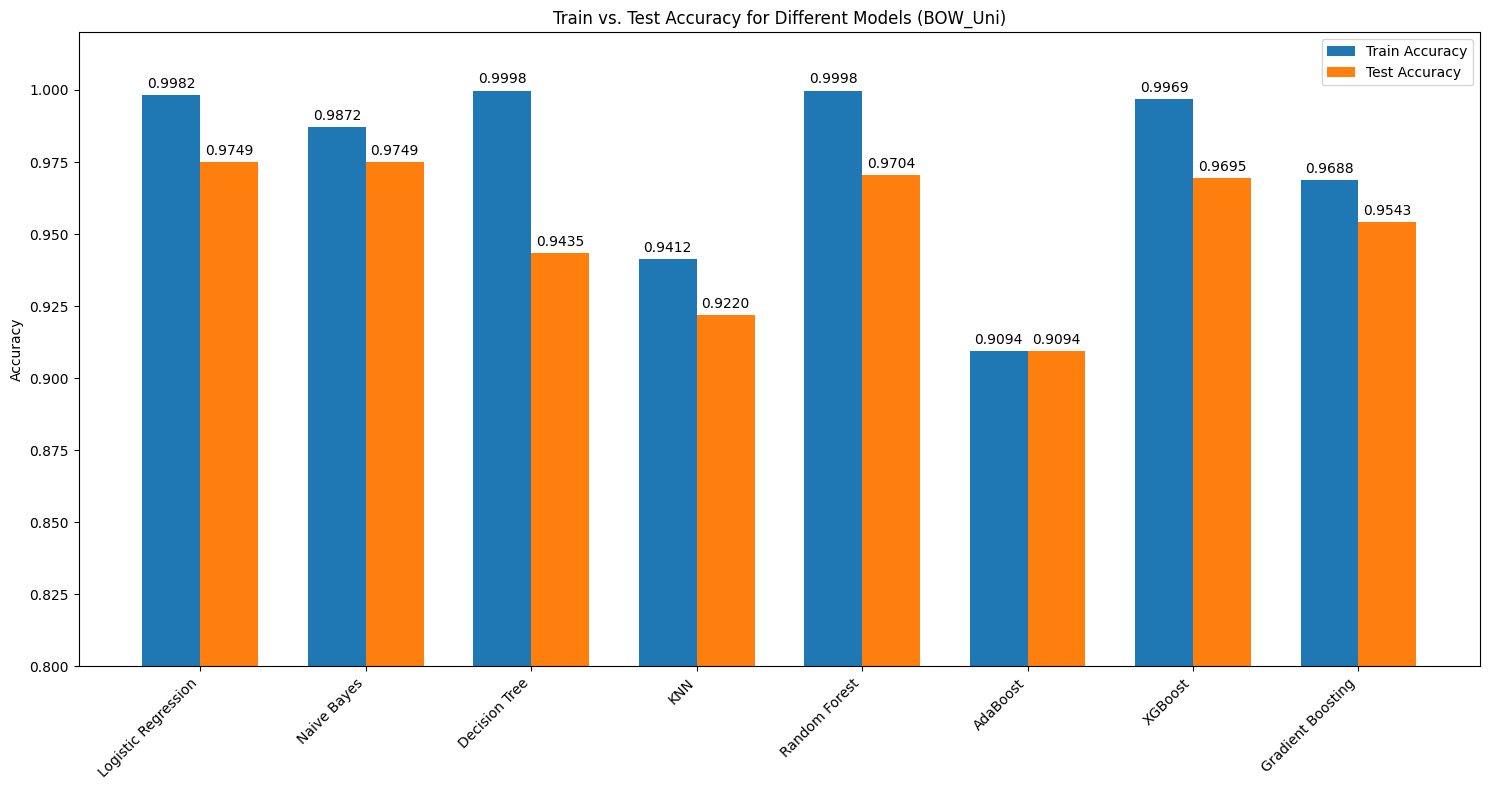

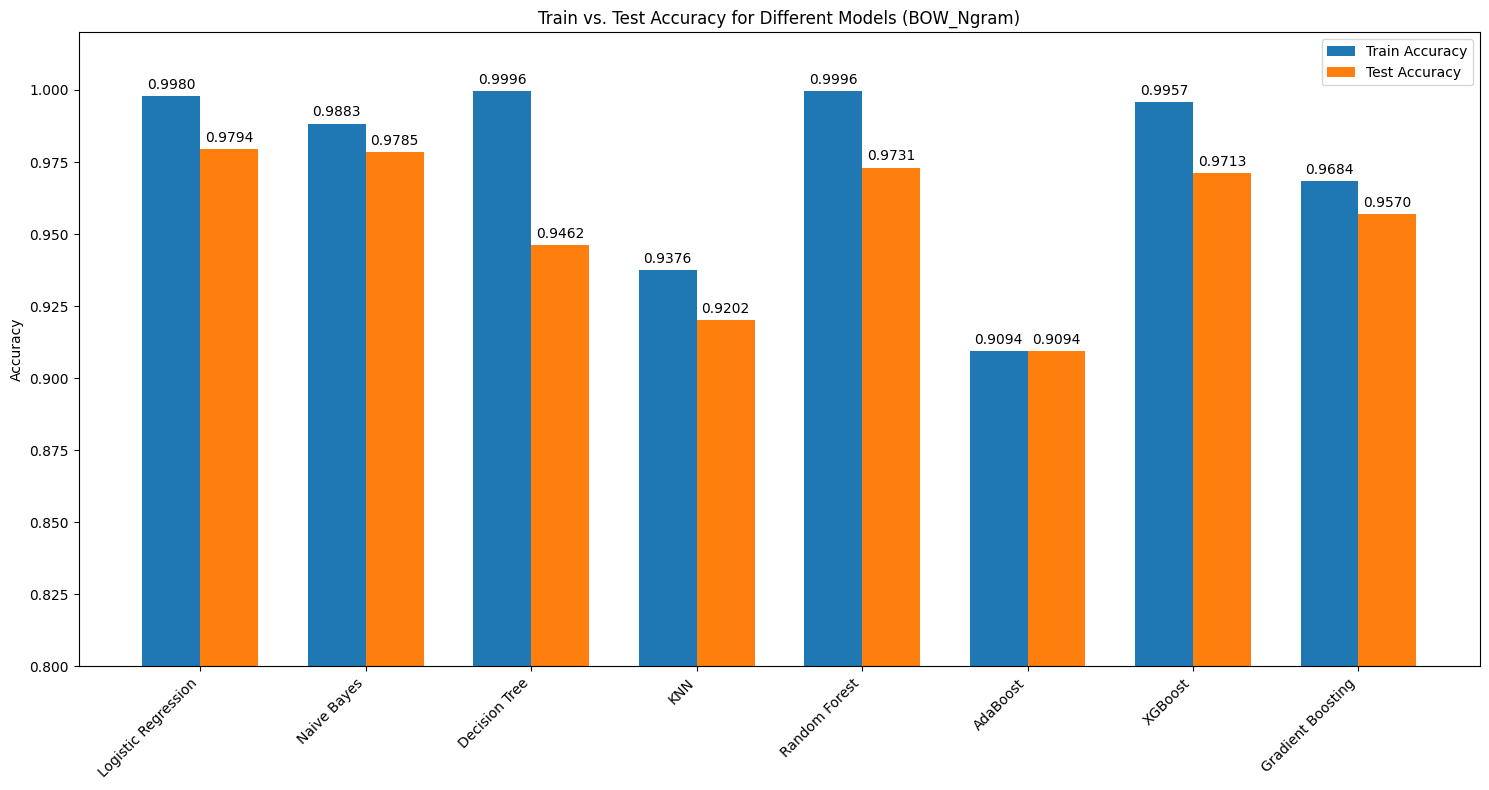

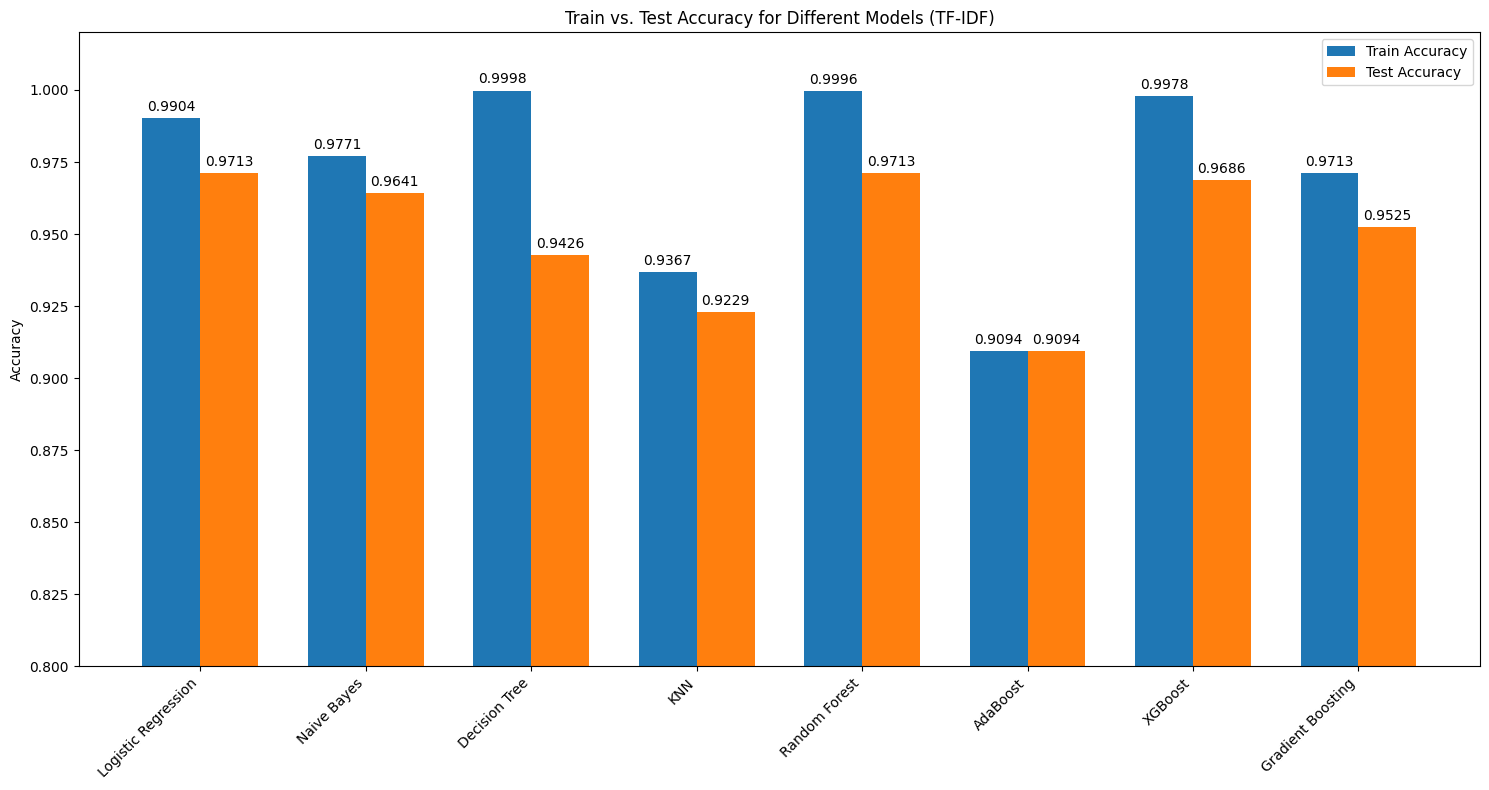

In [46]:
#Plotting to check overfitting

results_overfitting = {vec_name: {} for vec_name in vectorizers}

for vec_name, vec in vectorizers.items():
  X_train_vec = vec.fit_transform(X_train)
  X_test_vec = vec.transform(X_test)

  print(f"\n--- Checking Overfitting for Vectorizer: {vec_name} ---")

  for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_vec, y_train)

    # Predict on training and test sets
    train_preds = model.predict(X_train_vec)
    test_preds = model.predict(X_test_vec)

    # Calculate accuracies
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)

    results_overfitting[vec_name][model_name] = {
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc
    }

    print(f"  {model_name}: Train Acc={train_acc:.4f}, Test Acc={test_acc:.4f}")

# Now, let's plot the comparison of train and test accuracies for each model and vectorizer
for vec_name, model_results in results_overfitting.items():
  model_names = list(model_results.keys())
  train_accuracies = [model_results[name]['Train Accuracy'] for name in model_names]
  test_accuracies = [model_results[name]['Test Accuracy'] for name in model_names]

  x = np.arange(len(model_names)) # the label locations
  width = 0.35  # the width of the bars

  plt.figure(figsize=(15, 8))
  rects1 = plt.bar(x - width/2, train_accuracies, width, label='Train Accuracy')
  rects2 = plt.bar(x + width/2, test_accuracies, width, label='Test Accuracy')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  plt.ylabel('Accuracy')
  plt.title(f'Train vs. Test Accuracy for Different Models ({vec_name})')
  plt.xticks(x, model_names, rotation=45, ha="right")
  plt.legend()

  plt.ylim(0.8, 1.02) # Set a reasonable range for better visualization of differences

  def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
      height = rect.get_height()
      plt.annotate(f'{height:.4f}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom')

  autolabel(rects1)
  autolabel(rects2)

  plt.tight_layout()
  plt.show()

# Note: Overfitting is indicated when Train Accuracy is significantly higher than Test Accuracy.
# This analysis helps visualize that difference for various models and vectorizers.


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0



=== After including Pretrained DistilBERT (placeholder) ===
                        Model  Accuracy
15  Logistic Regression Tuned  0.980269
16        Random Forest Tuned  0.977578
4               Random Forest  0.973991
0         Logistic Regression  0.971300
10         Bidirectional LSTM  0.971300
6                     XGBoost  0.970404
17              XGBoost Tuned  0.965919
1                 Naive Bayes  0.964126
7           Gradient Boosting  0.952466
2               Decision Tree  0.947085
3                         KNN  0.921076
5                    AdaBoost  0.909417
9                        LSTM  0.866368
8                         RNN  0.866368
13                Stacked GRU  0.866368
12               Stacked LSTM  0.866368
11                        GRU  0.866368
14                 DistilBERT  0.133632


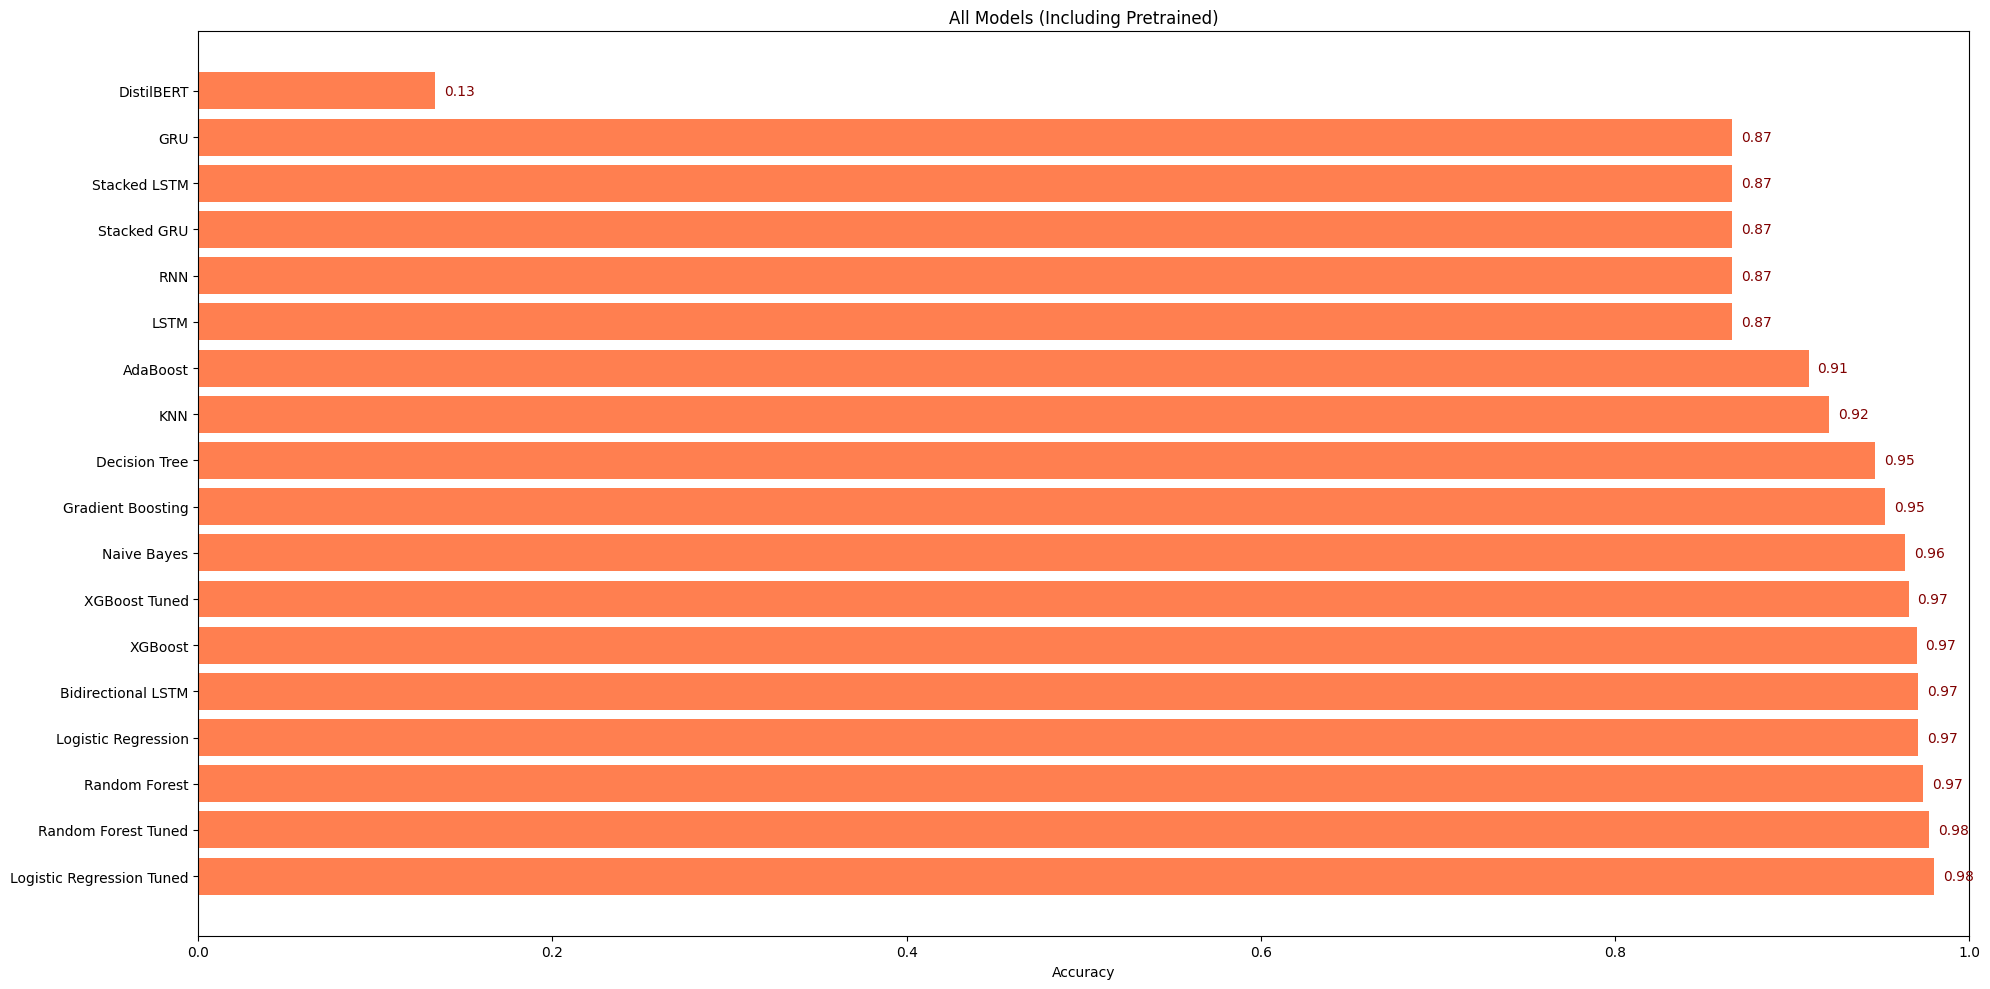

In [ ]:
try:
    from transformers import pipeline


    spam_pipeline = pipeline("text-classification", model="distilbert-base-uncased", tokenizer="distilbert-base-uncased")

    bert_preds = []
    for msg in X_test:
        pred = spam_pipeline(msg[:512])  # truncate long messages
        # The outputs here are generic labels (e.g. 'LABEL_0' / 'LABEL_1'),

        label = 1 if pred[0]['label'] in ['LABEL_1', 'SPAM'] else 0
        bert_preds.append(label)

    bert_acc = accuracy_score(y_test, bert_preds)
    results['DistilBERT'] = bert_acc

    results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
    print("\n=== After including Pretrained DistilBERT (placeholder) ===")
    print(results_df)

    plt.figure(figsize=(20, 10))
    plt.barh(results_df['Model'], results_df['Accuracy'], color='coral')
    plt.xlabel('Accuracy')
    plt.title('All Models (Including Pretrained)')
    plt.xlim(0, 1)
    for i, v in enumerate(results_df['Accuracy']):
        plt.text(v + 0.005, i, f"{v:.2f}", color='maroon', va='center')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Transformers pipeline unavailable or failed. Skipping pretrained models.")
    print(f"Error: {e}")


**Observation:** As we can observe that only 13% 'Spam' messages are present so their is an issue of class imbalance which may impact the accuracy in prediction to deal with this we will use SMOTE method in our models

# Using SMOTE

In [47]:
#  dealing  with class imbalance

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from collections import Counter

# Option 1: Oversampling with SMOTE
print("\n--- Applying SMOTE Oversampling ---")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_vec, y_train) # Use one of the vectorized training sets, e.g., TF-IDF
print(f"Original training set shape: {X_train_vec.shape}")
print(f"Resampled training set shape with SMOTE: {X_train_smote.shape}")
print(f"Class distribution after SMOTE: {Counter(y_train_smote)}")

# You would then train models on X_train_smote, y_train_smote

# Option 2: Undersampling with RandomUnderSampler
print("\n--- Applying RandomUnderSampler Undersampling ---")
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_vec, y_train) # Use the same vectorized training set
print(f"Original training set shape: {X_train_vec.shape}")
print(f"Resampled training set shape with RandomUnderSampler: {X_train_rus.shape}")
print(f"Class distribution after RandomUnderSampler: {Counter(y_train_rus)}")

# You would then train models on X_train_rus, y_train_rus

# Option 3: Combination of Oversampling and Undersampling with SMOTETomek
print("\n--- Applying SMOTETomek (Over- and Undersampling) ---")
smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_vec, y_train) # Use the same vectorized training set
print(f"Original training set shape: {X_train_vec.shape}")
print(f"Resampled training set shape with SMOTETomek: {X_train_smt.shape}")
print(f"Class distribution after SMOTETomek: {Counter(y_train_smt)}")



# Example: Re-training Logistic Regression with SMOTE data
print("\n--- Training Logistic Regression with SMOTE data ---")
model_lr_smote = LogisticRegression(max_iter=1000) # No need for class_weight='balanced' now
model_lr_smote.fit(X_train_smote, y_train_smote)
preds_lr_smote = model_lr_smote.predict(X_test_vec)
acc_lr_smote = accuracy_score(y_test, preds_lr_smote)
print(f"Accuracy of Logistic Regression (SMOTE): {acc_lr_smote:.4f}")
print(f"Classification Report for Logistic Regression (SMOTE):\n{classification_report(y_test, preds_lr_smote)}")



--- Applying SMOTE Oversampling ---
Original training set shape: (4457, 5000)
Resampled training set shape with SMOTE: (7718, 5000)
Class distribution after SMOTE: Counter({0: 3859, 1: 3859})

--- Applying RandomUnderSampler Undersampling ---
Original training set shape: (4457, 5000)
Resampled training set shape with RandomUnderSampler: (1196, 5000)
Class distribution after RandomUnderSampler: Counter({0: 598, 1: 598})

--- Applying SMOTETomek (Over- and Undersampling) ---
Original training set shape: (4457, 5000)
Resampled training set shape with SMOTETomek: (7718, 5000)
Class distribution after SMOTETomek: Counter({0: 3859, 1: 3859})

--- Training Logistic Regression with SMOTE data ---
Accuracy of Logistic Regression (SMOTE): 0.9713
Classification Report for Logistic Regression (SMOTE):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       966
           1       0.88      0.91      0.89       149

    accuracy                      

In [51]:

# Adjust the models dictionary to exclude the pretrained model
classical_ml_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                              scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Store performance results including classification report
performance_results = {vec_name: {} for vec_name in vectorizers}

for vec_name, vec in vectorizers.items():
    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)
    print(f"\n--- Vectorizer: {vec_name} ---")
    for model_name, model in classical_ml_models.items(): # Use the dictionary without the pretrained model
        print(f"  Training {model_name}...")
        model.fit(X_train_vec, y_train)
        preds = model.predict(X_test_vec)

        # Calculate metrics
        precision = precision_score(y_test, preds)
        recall = recall_score(y_test, preds)
        f1 = f1_score(y_test, preds)
        accuracy = accuracy_score(y_test, preds) # Also get accuracy

        performance_results[vec_name][model_name] = {
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1,
            'Accuracy': accuracy, # Store accuracy as well
            'Classification Report': classification_report(y_test, preds, output_dict=True) # Store the report
        }

        print(f"    Precision: {precision:.4f}")
        print(f"    Recall:    {recall:.4f}")
        print(f"    F1-score:  {f1:.4f}")
        print(f"    Accuracy:  {accuracy:.4f}")

# Display the classification report for each model and vectorizer
print("\n=== Classification Reports ===")
for vec_name, model_results in performance_results.items():
    print(f"\n--- Vectorizer: {vec_name} ---")
    for model_name, metrics in model_results.items():
        print(f"\n  {model_name}:")
        report = metrics['Classification Report']
        # Convert the dictionary report to a string for better readability
        report_str = classification_report(y_test, model.predict(X_test_vec), target_names=['ham', 'spam'])
        print(report_str)

# Display the metrics in a structured way (e.g., DataFrames)
print("\n=== Performance Metrics (Accuracy, Precision, Recall, F1) ===")
for vec_name, model_results in performance_results.items():
    print(f"\n--- Vectorizer: {vec_name} ---")
    metrics_df = pd.DataFrame.from_dict({
        model_name: {k: v for k, v in metrics.items() if k != 'Classification Report'}
        for model_name, metrics in model_results.items()
    }, orient='index')
    display(metrics_df)





--- Vectorizer: BOW_Uni ---
  Training Logistic Regression...
    Precision: 0.9231
    Recall:    0.8859
    F1-score:  0.9041
    Accuracy:  0.9749
  Training Naive Bayes...
    Precision: 0.9291
    Recall:    0.8792
    F1-score:  0.9034
    Accuracy:  0.9749
  Training Decision Tree...
    Precision: 0.7636
    Recall:    0.8456
    F1-score:  0.8025
    Accuracy:  0.9444
  Training KNN...
    Precision: 0.9559
    Recall:    0.4362
    F1-score:  0.5991
    Accuracy:  0.9220
  Training Random Forest...
    Precision: 0.9918
    Recall:    0.8121
    F1-score:  0.8930
    Accuracy:  0.9740
  Training AdaBoost...
    Precision: 0.9800
    Recall:    0.3289
    F1-score:  0.4925
    Accuracy:  0.9094
  Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:09:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    Precision: 0.8966
    Recall:    0.8725
    F1-score:  0.8844
    Accuracy:  0.9695
  Training Gradient Boosting...
    Precision: 0.9455
    Recall:    0.6980
    F1-score:  0.8031
    Accuracy:  0.9543

--- Vectorizer: BOW_Ngram ---
  Training Logistic Regression...
    Precision: 0.9632
    Recall:    0.8792
    F1-score:  0.9193
    Accuracy:  0.9794
  Training Naive Bayes...
    Precision: 0.9562
    Recall:    0.8792
    F1-score:  0.9161
    Accuracy:  0.9785
  Training Decision Tree...
    Precision: 0.8000
    Recall:    0.8322
    F1-score:  0.8158
    Accuracy:  0.9498
  Training KNN...
    Precision: 1.0000
    Recall:    0.4027
    F1-score:  0.5742
    Accuracy:  0.9202
  Training Random Forest...
    Precision: 0.9918
    Recall:    0.8121
    F1-score:  0.8930
    Accuracy:  0.9740
  Training AdaBoost...
    Precision: 0.9800
    Recall:    0.3289
    F1-score:  0.4925
    Accuracy:  0.9094
  Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:09:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    Precision: 0.9034
    Recall:    0.8792
    F1-score:  0.8912
    Accuracy:  0.9713
  Training Gradient Boosting...
    Precision: 0.9623
    Recall:    0.6846
    F1-score:  0.8000
    Accuracy:  0.9543

--- Vectorizer: TF-IDF ---
  Training Logistic Regression...
    Precision: 0.8824
    Recall:    0.9060
    F1-score:  0.8940
    Accuracy:  0.9713
  Training Naive Bayes...
    Precision: 1.0000
    Recall:    0.7315
    F1-score:  0.8450
    Accuracy:  0.9641
  Training Decision Tree...
    Precision: 0.7662
    Recall:    0.7919
    F1-score:  0.7789
    Accuracy:  0.9399
  Training KNN...
    Precision: 1.0000
    Recall:    0.4228
    F1-score:  0.5943
    Accuracy:  0.9229
  Training Random Forest...
    Precision: 0.9839
    Recall:    0.8188
    F1-score:  0.8938
    Accuracy:  0.9740
  Training AdaBoost...
    Precision: 0.9800
    Recall:    0.3289
    F1-score:  0.4925
    Accuracy:  0.9094
  Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:09:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    Precision: 0.8904
    Recall:    0.8725
    F1-score:  0.8814
    Accuracy:  0.9686
  Training Gradient Boosting...
    Precision: 0.9439
    Recall:    0.6779
    F1-score:  0.7891
    Accuracy:  0.9516

=== Classification Reports ===

--- Vectorizer: BOW_Uni ---

  Logistic Regression:
              precision    recall  f1-score   support

         ham       0.95      0.99      0.97       966
        spam       0.94      0.68      0.79       149

    accuracy                           0.95      1115
   macro avg       0.95      0.84      0.88      1115
weighted avg       0.95      0.95      0.95      1115


  Naive Bayes:
              precision    recall  f1-score   support

         ham       0.95      0.99      0.97       966
        spam       0.94      0.68      0.79       149

    accuracy                           0.95      1115
   macro avg       0.95      0.84      0.88      1115
weighted avg       0.95      0.95      0.95      1115


  Decision Tree:
              preci

,Precision,Recall,F1-score,Accuracy
Logistic Regression,0.923077,0.885906,0.904110,0.974888
Naive Bayes,0.929078,0.879195,0.903448,0.974888
Decision Tree,0.763636,0.845638,0.802548,0.944395
KNN,0.955882,0.436242,0.599078,0.921973
Random Forest,0.991803,0.812081,0.892989,0.973991
AdaBoost,0.980000,0.328859,0.492462,0.909417
XGBoost,0.896552,0.872483,0.884354,0.969507
Gradient Boosting,0.945455,0.697987,0.803089,0.954260



--- Vectorizer: BOW_Ngram ---


,Precision,Recall,F1-score,Accuracy
Logistic Regression,0.963235,0.879195,0.919298,0.979372
Naive Bayes,0.956204,0.879195,0.916084,0.978475
Decision Tree,0.800000,0.832215,0.815789,0.949776
KNN,1.000000,0.402685,0.574163,0.920179
Random Forest,0.991803,0.812081,0.892989,0.973991
AdaBoost,0.980000,0.328859,0.492462,0.909417
XGBoost,0.903448,0.879195,0.891156,0.971300
Gradient Boosting,0.962264,0.684564,0.800000,0.954260



--- Vectorizer: TF-IDF ---


,Precision,Recall,F1-score,Accuracy
Logistic Regression,0.882353,0.906040,0.894040,0.971300
Naive Bayes,1.000000,0.731544,0.844961,0.964126
Decision Tree,0.766234,0.791946,0.778878,0.939910
KNN,1.000000,0.422819,0.594340,0.922870
Random Forest,0.983871,0.818792,0.893773,0.973991
AdaBoost,0.980000,0.328859,0.492462,0.909417
XGBoost,0.890411,0.872483,0.881356,0.968610
Gradient Boosting,0.943925,0.677852,0.789062,0.951570


In [49]:
#  after smote train



# Define vectorizers (same as before)
vectorizers = {
    'BOW_Uni': CountVectorizer(ngram_range=(1, 1), stop_words='english', max_features=5000),
    'BOW_Ngram': CountVectorizer(ngram_range=(1, 2), stop_words='english', max_features=5000),
    'TF-IDF': TfidfVectorizer(ngram_range=(1, 1), stop_words='english', max_features=5000)
}

vocab_size = 10000 # Based on previous tokenization
max_len = 100 # Based on previous padding

def rnn_model(vocab_size, embed_dim, max_len):
    m = Sequential([
        Embedding(vocab_size, embed_dim, input_length=max_len),
        SimpleRNN(64),
        Dense(1, activation='sigmoid')
    ])
    return m

def lstm_model(vocab_size, embed_dim, max_len):
    m = Sequential([
        Embedding(vocab_size, embed_dim, input_length=max_len),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])
    return m

def bi_lstm_model(vocab_size, embed_dim, max_len):
    m = Sequential([
        Embedding(vocab_size, embed_dim, input_length=max_len),
        Bidirectional(LSTM(64)),
        Dense(1, activation='sigmoid')
    ])
    return m

def gru_model(vocab_size, embed_dim, max_len):
    m = Sequential([
        Embedding(vocab_size, embed_dim, input_length=max_len),
        GRU(64),
        Dense(1, activation='sigmoid')
    ])
    return m

def stacked_lstm_model(vocab_size, embed_dim, max_len):
    m = Sequential([
        Embedding(vocab_size, embed_dim, input_length=max_len),
        LSTM(64, return_sequences=True),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ])
    return m

def stacked_gru_model(vocab_size, embed_dim, max_len):
    m = Sequential([
        Embedding(vocab_size, embed_dim, input_length=max_len),
        GRU(64, return_sequences=True),
        GRU(32),
        Dense(1, activation='sigmoid')
    ])
    return m


# Define the dictionary of models to train
all_models_except_pretrained = {
    'Logistic Regression': LogisticRegression(max_iter=1000), # Remove class_weight='balanced' for SMOTE
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(), # Remove class_weight='balanced' for SMOTE
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(), # Remove class_weight='balanced' for SMOTE
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'), # Remove scale_pos_weight for SMOTE
    'Gradient Boosting': GradientBoostingClassifier(),
    # Add DL models placeholders - they will be trained separately using the padded sequences
    'RNN': None,
    'LSTM': None,
    'Bidirectional LSTM': None,
    'GRU': None,
    'Stacked LSTM': None,
    'Stacked GRU': None,
}

# Initialize a dictionary to store classification reports
classification_reports_smote = {}
accuracy_scores_smote = {}

# Prepare data for SMOTE and DL models (using TF-IDF as an example vectorizer)
# We will apply SMOTE to the vectorized data. For DL models, we use the padded sequences.

# First, apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1), stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Apply SMOTE to the TF-IDF vectorized training data
print("\n--- Applying SMOTE to TF-IDF Data ---")
smote = SMOTE(random_state=42)
X_train_tfidf_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)
print(f"Original TF-IDF training set shape: {X_train_tfidf.shape}")
print(f"Resampled TF-IDF training set shape with SMOTE: {X_train_tfidf_smote.shape}")
print(f"Class distribution after SMOTE: {Counter(y_train_smote)}")


# Train and evaluate Classical ML Models on SMOTE-resampled data
print("\n--- Training Classical ML Models on SMOTE-resampled TF-IDF data ---")
for model_name, model in all_models_except_pretrained.items():
    if model_name in ['RNN', 'LSTM', 'Bidirectional LSTM', 'GRU', 'Stacked LSTM', 'Stacked GRU']:
        continue # Skip DL models for now, they use padded sequences

    print(f"  Training {model_name}...")
    try:
        model.fit(X_train_tfidf_smote, y_train_smote)
        preds = model.predict(X_test_tfidf)

        # Get classification report
        report = classification_report(y_test, preds, target_names=['ham', 'spam'])
        classification_reports_smote[model_name] = report

        # Get accuracy
        acc = accuracy_score(y_test, preds)
        accuracy_scores_smote[model_name] = acc

        print(f"    {model_name} Accuracy: {acc:.4f}")
        print(f"\nClassification Report for {model_name}:\n{report}")

    except Exception as e:
        print(f"Error training {model_name}: {e}")


# Prepare data for Deep Learning models (padded sequences)
# Ensure tokenizer_dl and padded sequences (X_train_pad, X_test_pad) are available from previous code
try:
    # Assuming tokenizer_dl and padded sequences are already created in the preceding code
    if 'tokenizer_dl' not in locals() or 'X_train_pad' not in locals() or 'X_test_pad' not in locals():
         print("\n--- Preparing data for Deep Learning models ---")
         tokenizer_dl = Tokenizer(num_words=10000, oov_token="<OOV>")
         tokenizer_dl.fit_on_texts(X_train)
         X_train_seq = tokenizer_dl.texts_to_sequences(X_train)
         X_test_seq = tokenizer_dl.texts_to_sequences(X_test)
         max_len = 100 # Define max_len if not defined globally
         X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
         X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')
         vocab_size = len(tokenizer_dl.word_index) + 1 # Update vocab_size based on actual tokenizer
         embed_dim = 16 # Define embed_dim if not defined globally


    # Train and evaluate Deep Learning Models
    print("\n--- Training Deep Learning Models ---")
    embed_dim = 16 # Define embedding dimension for DL models

    def train_dl_model_and_report(model_builder, name, X_train_data, y_train_data, X_test_data, y_test_data):
        print(f"  Training {name}...")
        try:
            model = model_builder(vocab_size, embed_dim, max_len)
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            # We don't apply SMOTE directly to padded sequences; class_weight could be an option but let's train on imbalanced data first
            model.fit(X_train_data, y_train_data, epochs=3, batch_size=32, validation_split=0.1, verbose=0)

            # Evaluate and get report
            loss, acc = model.evaluate(X_test_data, y_test_data, verbose=0)
            preds_prob = model.predict(X_test_data)
            preds = (preds_prob > 0.5).astype("int") # Convert probabilities to binary predictions

            report = classification_report(y_test_data, preds, target_names=['ham', 'spam'])
            classification_reports_smote[name] = report # Store in the same dictionary for comparison

            accuracy_scores_smote[name] = acc # Store accuracy

            print(f"    {name} Accuracy: {acc:.4f}")
            print(f"\nClassification Report for {name}:\n{report}")

        except Exception as e:
            print(f"Error training {name}: {e}")


    # Train and evaluate deep learning models using the padded sequences
    train_dl_model_and_report(rnn_model, 'RNN', X_train_pad, y_train, X_test_pad, y_test)
    train_dl_model_and_report(lstm_model, 'LSTM', X_train_pad, y_train, X_test_pad, y_test)
    train_dl_model_and_report(bi_lstm_model, 'Bidirectional LSTM', X_train_pad, y_train, X_test_pad, y_test)
    train_dl_model_and_report(gru_model, 'GRU', X_train_pad, y_train, X_test_pad, y_test)
    train_dl_model_and_report(stacked_lstm_model, 'Stacked LSTM', X_train_pad, y_train, X_test_pad, y_test)
    train_dl_model_and_report(stacked_gru_model, 'Stacked GRU', X_train_pad, y_train, X_test_pad, y_test)

except ImportError:
    print("\nTensorFlow/Keras not installed. Skipping deep learning training and evaluation.")
except Exception as e:
     print(f"\nError during Deep Learning setup or training: {e}. Skipping Deep Learning evaluation.")


# Print all collected classification reports
print("\n=== Classification Reports for all models (except pretrained BERT) after training on potentially SMOTE'd or original data ===")
for model_name, report in classification_reports_smote.items():
    print(f"\n--- {model_name} ---")
    print(report)

# Optional: Display accuracies in a table
print("\n=== Accuracy Scores ===")
accuracy_df = pd.DataFrame(list(accuracy_scores_smote.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
accuracy_df


--- Applying SMOTE to TF-IDF Data ---
Original TF-IDF training set shape: (4457, 5000)
Resampled TF-IDF training set shape with SMOTE: (7718, 5000)
Class distribution after SMOTE: Counter({0: 3859, 1: 3859})

--- Training Classical ML Models on SMOTE-resampled TF-IDF data ---
  Training Logistic Regression...
    Logistic Regression Accuracy: 0.9713

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       966
        spam       0.88      0.91      0.89       149

    accuracy                           0.97      1115
   macro avg       0.93      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115

  Training Naive Bayes...
    Naive Bayes Accuracy: 0.9525

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

         ham       0.99      0.96      0.97       966
        spam       0.77      0.92      0.84       149

    accur

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:05:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    XGBoost Accuracy: 0.9704

Classification Report for XGBoost:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       966
        spam       0.91      0.86      0.89       149

    accuracy                           0.97      1115
   macro avg       0.95      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115

  Training Gradient Boosting...
    Gradient Boosting Accuracy: 0.9578

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

         ham       0.97      0.98      0.98       966
        spam       0.89      0.79      0.83       149

    accuracy                           0.96      1115
   macro avg       0.93      0.88      0.90      1115
weighted avg       0.96      0.96      0.96      1115


--- Training Deep Learning Models ---
  Training RNN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src

    RNN Accuracy: 0.8664

Classification Report for RNN:
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       966
        spam       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115

  Training LSTM...
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
    LSTM Accuracy: 0.8664

Classification Report for LSTM:
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       966
        spam       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115

  Training Bidirectional LSTM...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
    Bidirectional LSTM Accuracy: 0.9812

Classification Report for Bidirectional LSTM:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.98      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

  Training GRU...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
    GRU Accuracy: 0.8664

Classification Report for GRU:
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       966
        spam       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115

  Training Stacked LSTM...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
    Stacked LSTM Accuracy: 0.8664

Classification Report for Stacked LSTM:
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       966
        spam       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115

  Training Stacked GRU...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
    Stacked GRU Accuracy: 0.8664

Classification Report for Stacked GRU:
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       966
        spam       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115


=== Classification Reports for all models (except pretrained BERT) after training on potentially SMOTE'd or original data ===

--- Logistic Regression ---
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       966
        spam       0.88      0.91      0.89       149

    accuracy                           0.97      1115
   macro avg       0.93      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115


--- Naive Bayes ---
              precision    recall  f1-score   support

  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy
10,Bidirectional LSTM,0.981166
4,Random Forest,0.972197
0,Logistic Regression,0.971300
6,XGBoost,0.970404
7,Gradient Boosting,0.957848
1,Naive Bayes,0.952466
2,Decision Tree,0.949776
5,AdaBoost,0.928251
9,LSTM,0.866368
8,RNN,0.866368



=== Confusion Matrices for Classical ML Models ===

--- Vectorizer: BOW_Uni ---
  Generating CM for Logistic Regression...


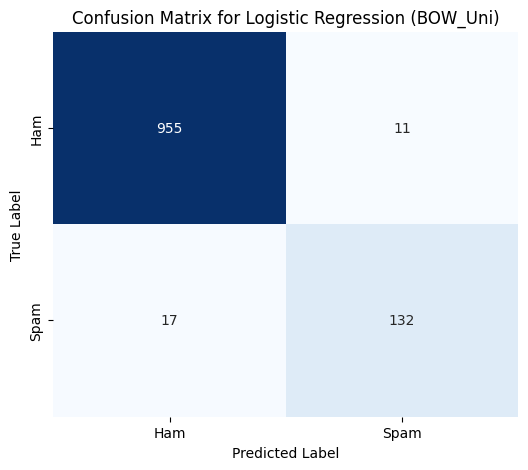

  Generating CM for Naive Bayes...


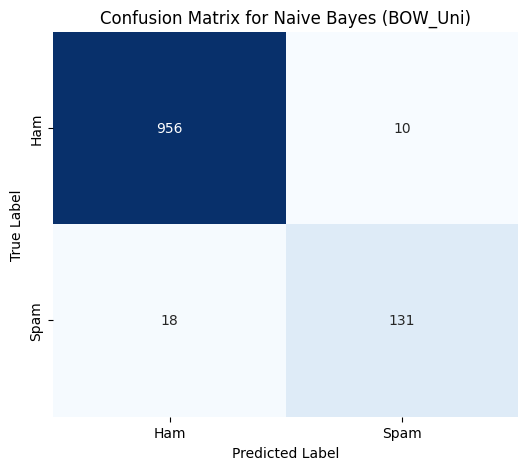

  Generating CM for Decision Tree...


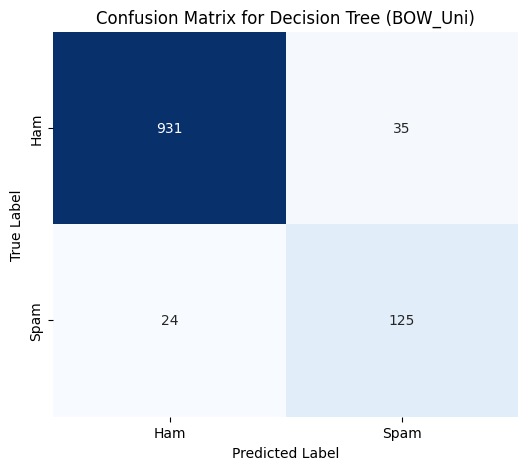

  Generating CM for KNN...


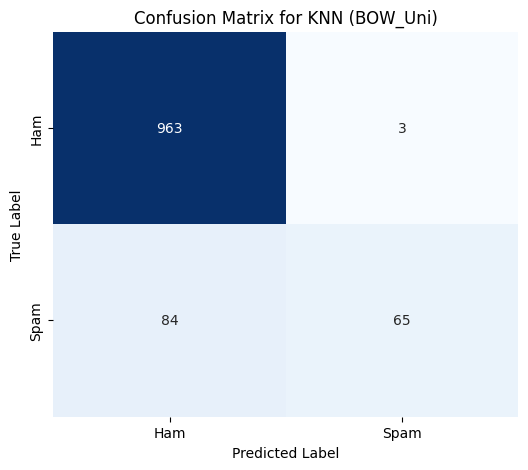

  Generating CM for Random Forest...


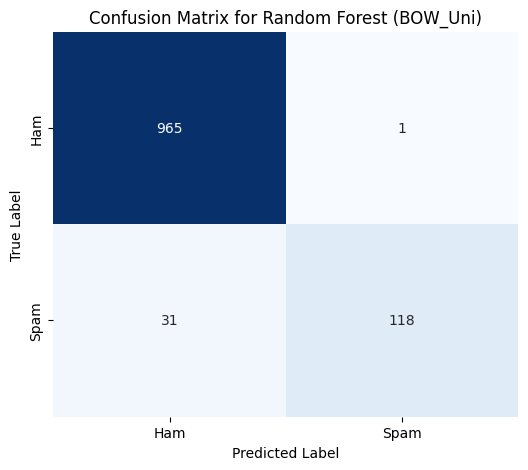

  Generating CM for AdaBoost...


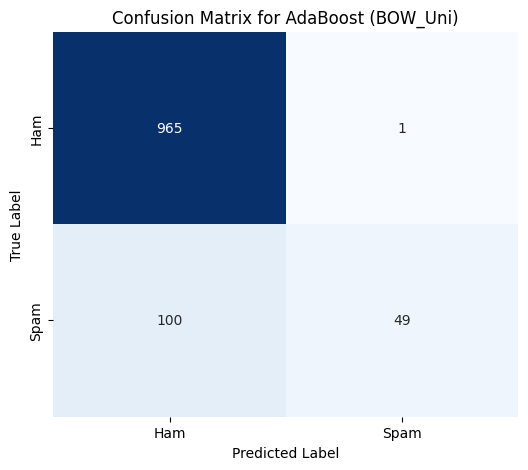

  Generating CM for XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


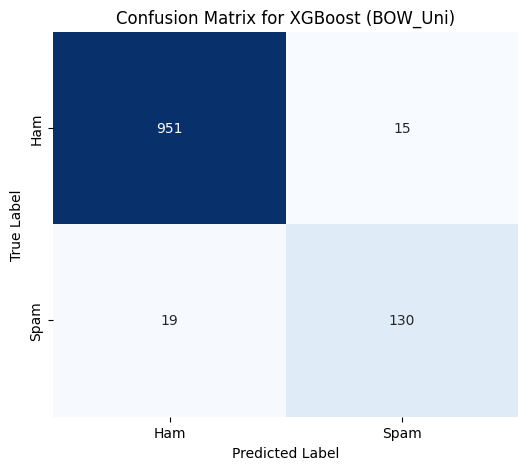

  Generating CM for Gradient Boosting...


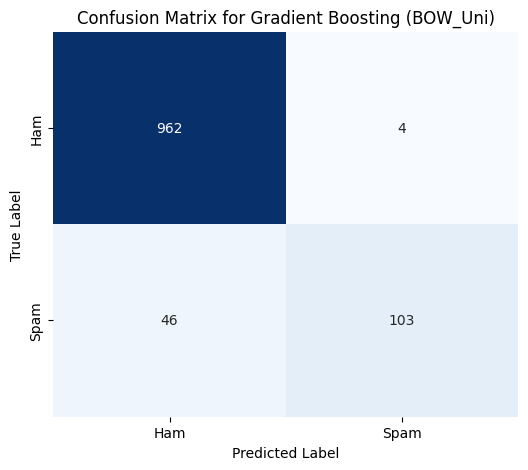


--- Vectorizer: BOW_Ngram ---
  Generating CM for Logistic Regression...


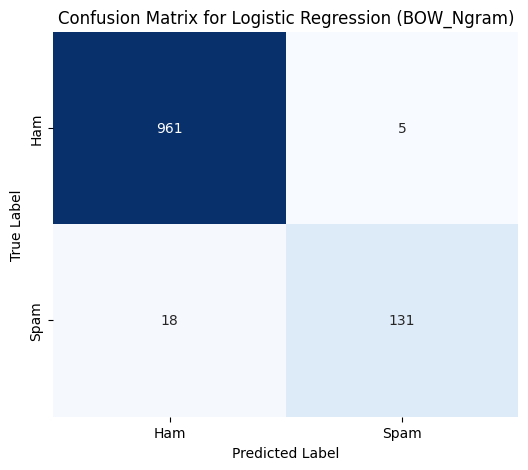

  Generating CM for Naive Bayes...


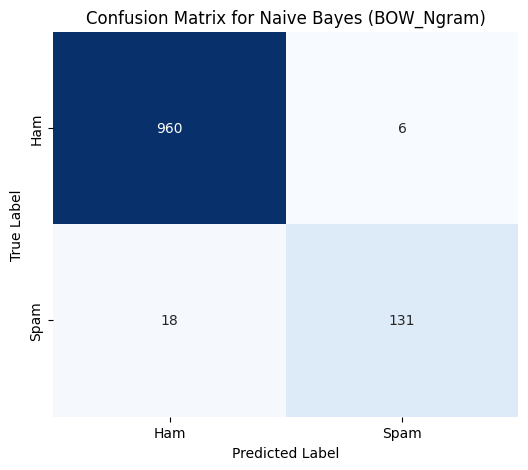

  Generating CM for Decision Tree...


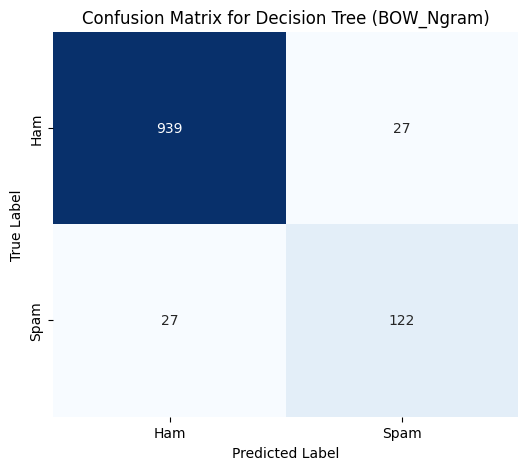

  Generating CM for KNN...


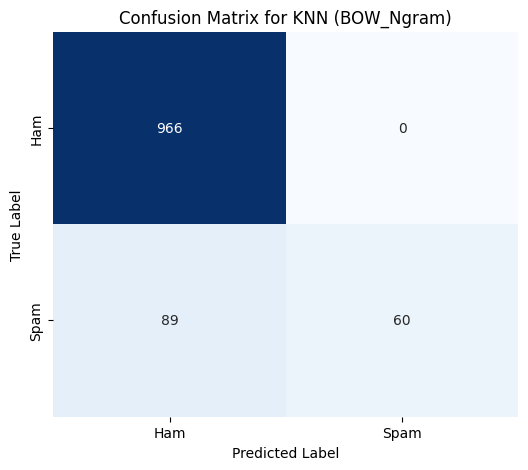

  Generating CM for Random Forest...


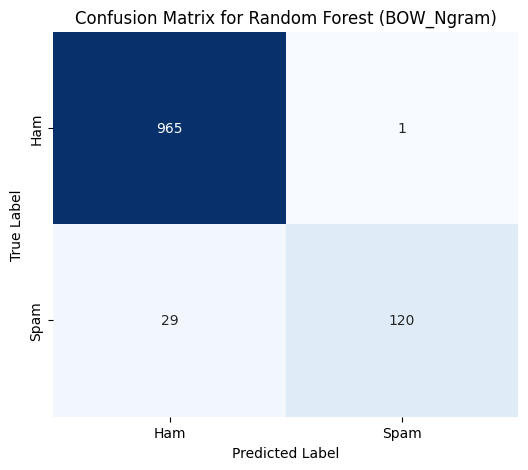

  Generating CM for AdaBoost...


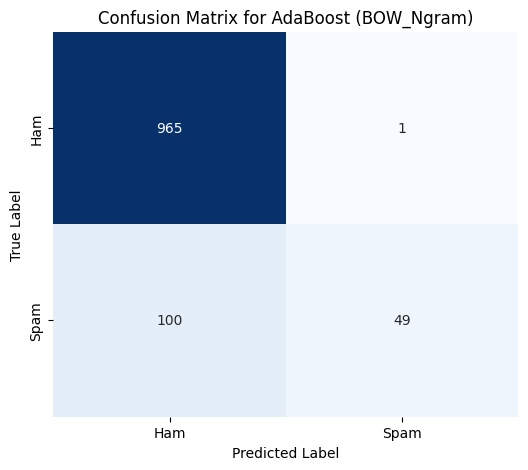

  Generating CM for XGBoost...


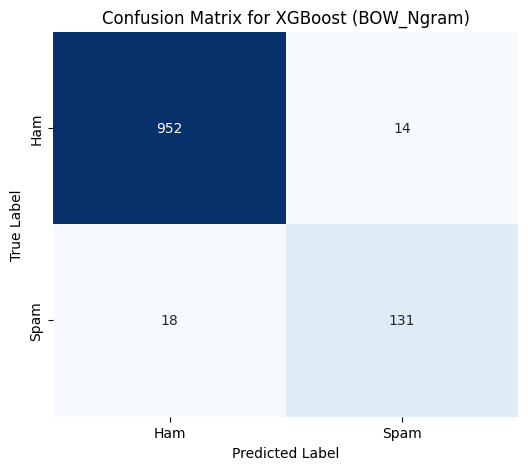

  Generating CM for Gradient Boosting...


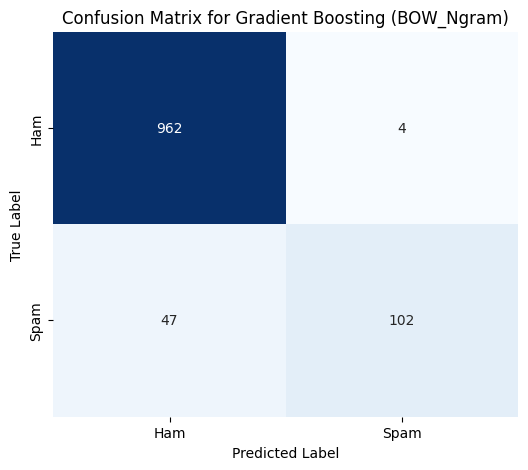


--- Vectorizer: TF-IDF ---
  Generating CM for Logistic Regression...


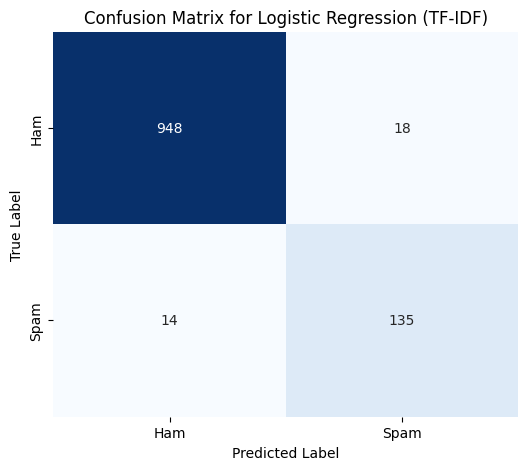

  Generating CM for Naive Bayes...


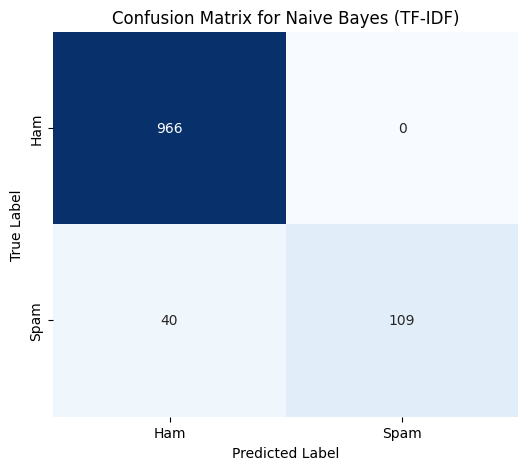

  Generating CM for Decision Tree...


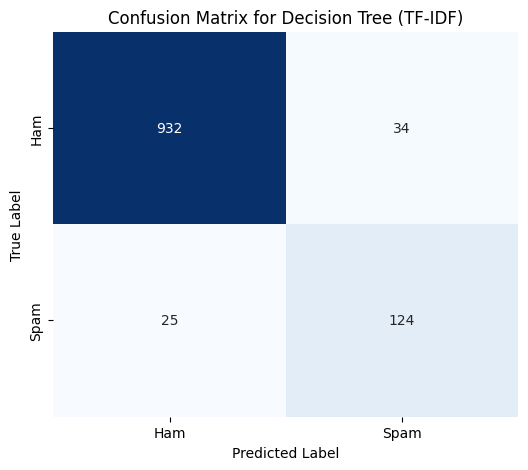

  Generating CM for KNN...


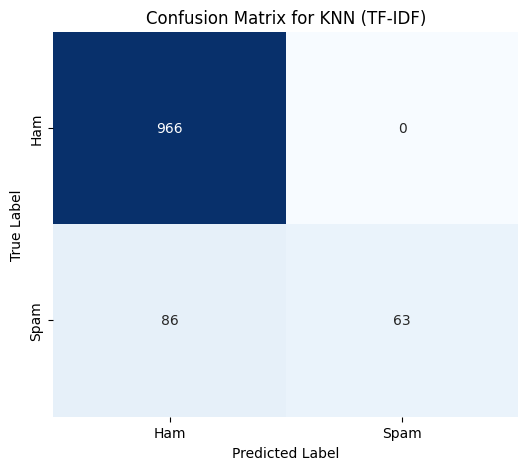

  Generating CM for Random Forest...


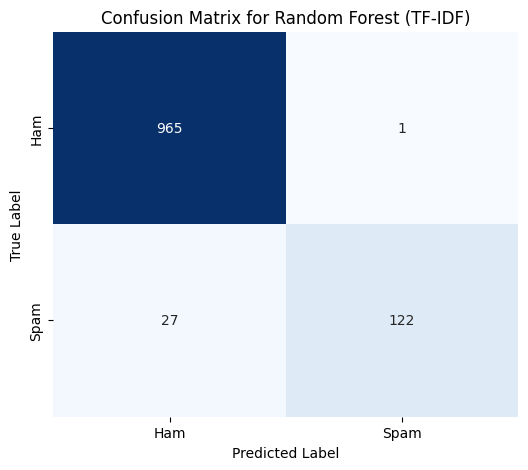

  Generating CM for AdaBoost...


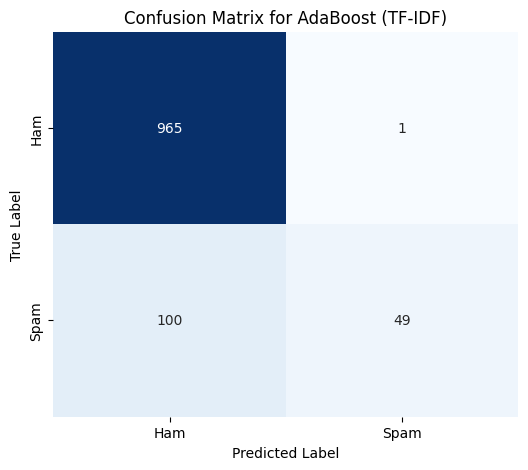

  Generating CM for XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


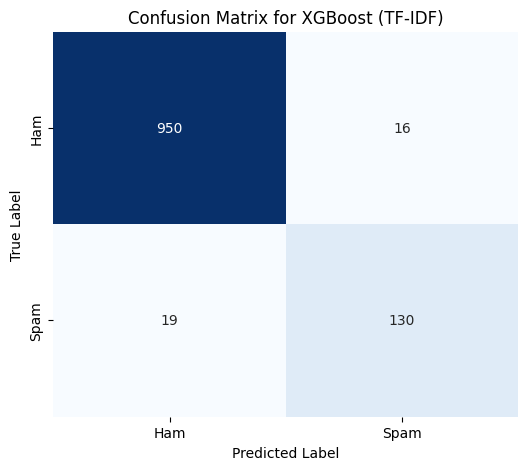

  Generating CM for Gradient Boosting...


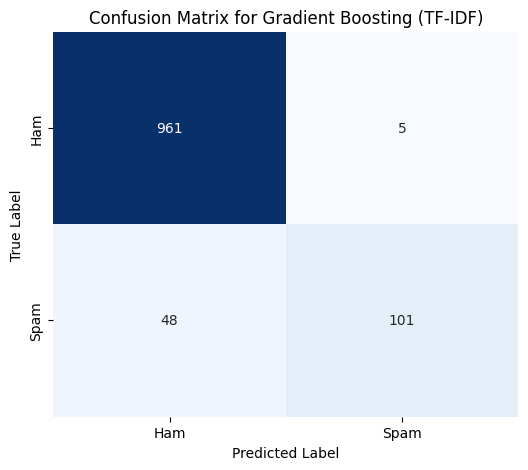


=== Confusion Matrices for Deep Learning Models ===
Using padded test data with shape: (1115, 100)
  Generating CM for RNN...
    (Briefly fitting RNN for predictions...)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


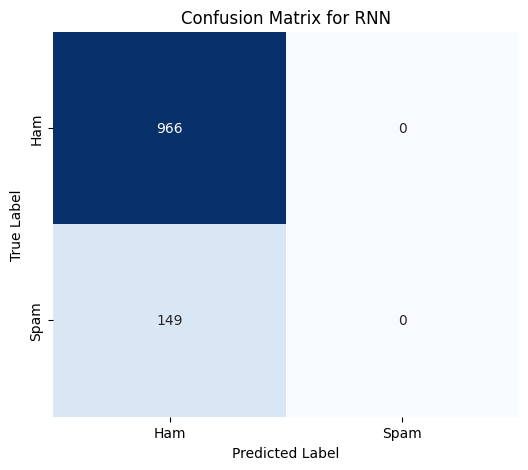

  Generating CM for LSTM...
    (Briefly fitting LSTM for predictions...)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


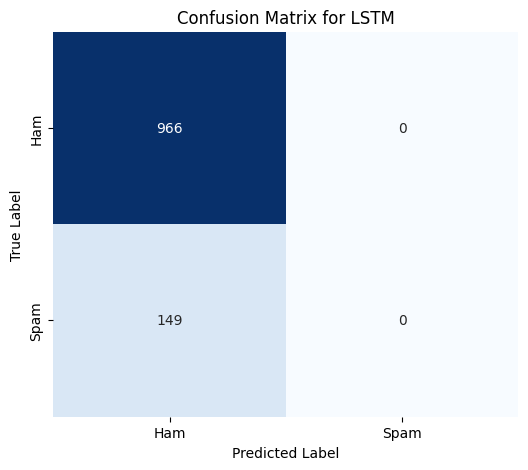

  Generating CM for Bidirectional LSTM...
    (Briefly fitting Bidirectional LSTM for predictions...)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


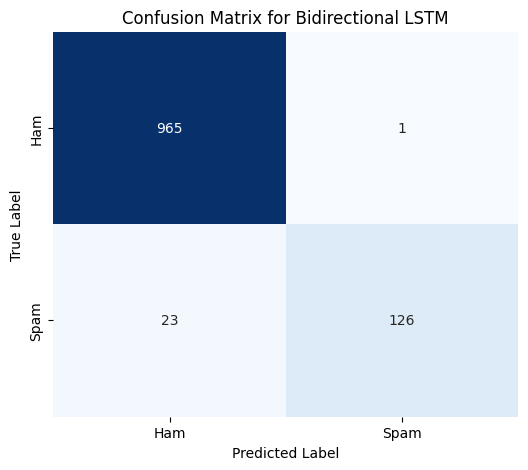

  Generating CM for GRU...
    (Briefly fitting GRU for predictions...)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


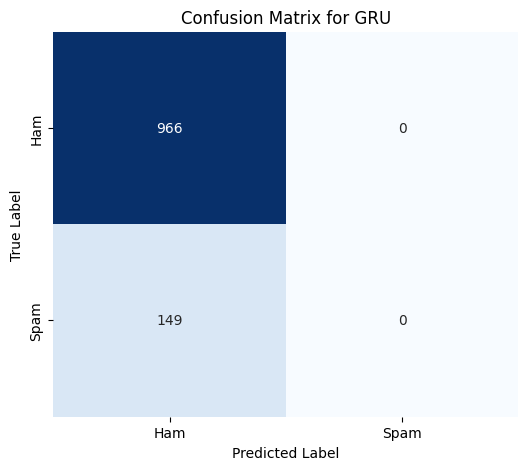

  Generating CM for Stacked LSTM...
    (Briefly fitting Stacked LSTM for predictions...)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


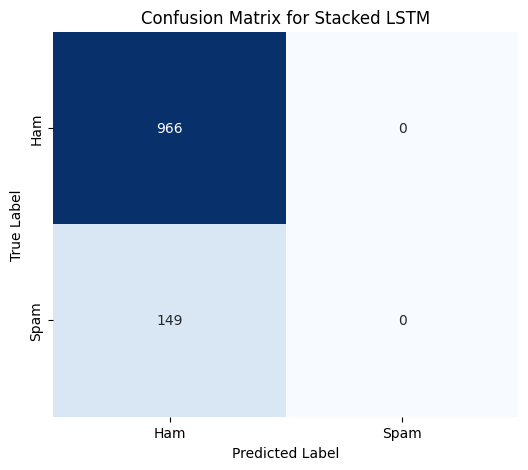

  Generating CM for Stacked GRU...
    (Briefly fitting Stacked GRU for predictions...)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


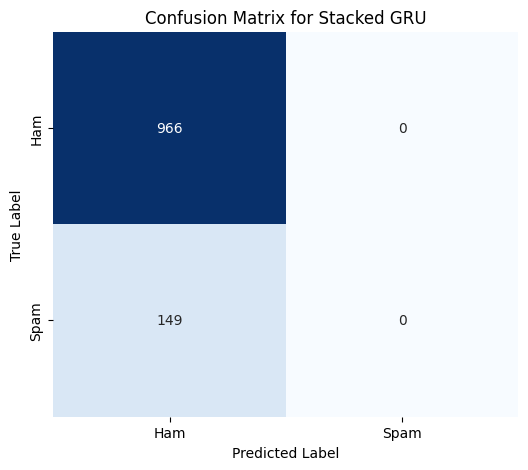


=== Confusion Matrix for Pretrained DistilBERT ===
  Generating CM for DistilBERT...
    Predicting with DistilBERT pipeline on test set (may take time)...


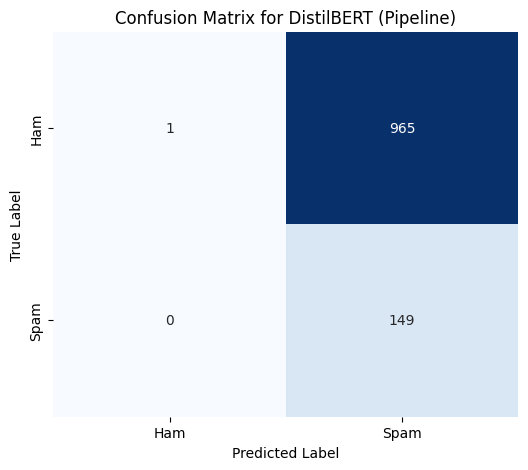


=== Confusion Matrix for Tuned Keras DL Model ===
  Generating CM for Tuned Keras DL Model...
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


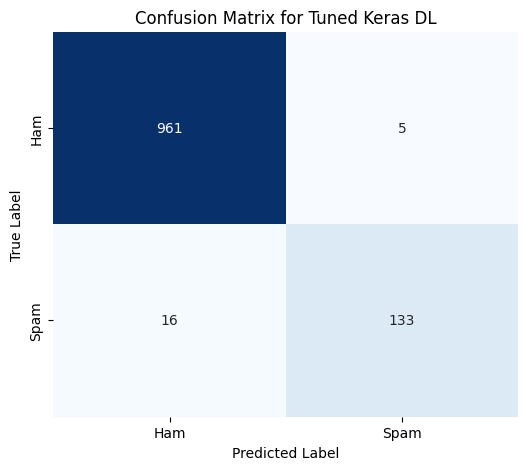

In [60]:


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, vectorizer_name=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    title = f'Confusion Matrix for {model_name}'
    if vectorizer_name:
      title += f' ({vectorizer_name})'
    plt.title(title)
    plt.show()

# --- Plotting Confusion Matrix for Classical ML Models ---
print("\n=== Confusion Matrices for Classical ML Models ===")
for vec_name, vec in vectorizers.items():
    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)
    print(f"\n--- Vectorizer: {vec_name} ---")
    for model_name, model in models.items():
        # Exclude DL and potentially pretrained models if they were added to this dict
        if model_name in ['RNN', 'LSTM', 'Bidirectional LSTM', 'GRU', 'Stacked LSTM', 'Stacked GRU', 'DistilBERT']:
             continue

        print(f"  Generating CM for {model_name}...")
        try:
            model.fit(X_train_vec, y_train)
            preds = model.predict(X_test_vec)
            plot_confusion_matrix(y_test, preds, model_name, vec_name)
        except Exception as e:
            print(f"    Could not generate CM for {model_name}: {e}")


# --- Plotting Confusion Matrix for Deep Learning Models ---

print("\n=== Confusion Matrices for Deep Learning Models ===")


dl_model_builders = {
    'RNN': rnn_model,
    'LSTM': lstm_model,
    'Bidirectional LSTM': bi_lstm_model,
    'GRU': gru_model,
    'Stacked LSTM': stacked_lstm_model,
    'Stacked GRU': stacked_gru_model,
}

# Assuming vocab_size, embed_dim, max_len, X_test_pad are defined from previous code
try:
    # Ensure padded data is ready if not already in memory
    if 'X_test_pad' not in locals():
        print("\n--- Preparing data for Deep Learning models ---")
        # This section should ideally re-use the tokenizer and max_len from the previous steps
        # For simplicity, re-creating it here if not found
        if 'tokenizer_dl' not in locals():
             tokenizer_dl = Tokenizer(num_words=10000, oov_token="<OOV>")
             tokenizer_dl.fit_on_texts(pd.concat([X_train, X_test])) # Fit on all data for consistent tokenization
        X_test_seq = tokenizer_dl.texts_to_sequences(X_test)
        if 'max_len' not in locals():
             max_len = 100 # Define max_len if not defined globally
        X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')
        if 'vocab_size' not in locals():
             vocab_size = len(tokenizer_dl.word_index) + 1
        if 'embed_dim' not in locals():
             embed_dim = 16

    print(f"Using padded test data with shape: {X_test_pad.shape}")

    for name, model_builder in dl_model_builders.items():
        print(f"  Generating CM for {name}...")
        try:

            model = model_builder(vocab_size, embed_dim, max_len)
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

            print(f"    (Briefly fitting {name} for predictions...)")
            if 'X_train_pad' in locals():
                 model.fit(X_train_pad, y_train, epochs=2, batch_size=32, verbose=0) # Short training for prediction
            else:
                 print("Warning: X_train_pad not found. Cannot fit DL models for CM.")
                 continue # Skip if training data is missing

            preds_prob = model.predict(X_test_pad)
            preds = (preds_prob > 0.5).astype("int") # Convert probabilities to binary

            plot_confusion_matrix(y_test, preds, name)

        except Exception as e:
            print(f"    Could not generate CM for DL model {name}: {e}")

except NameError:
    print("\nTensorFlow/Keras Deep Learning models or data not found. Skipping DL Confusion Matrices.")
except Exception as e:
    print(f"\nError during Deep Learning CM generation: {e}")


# --- Plotting Confusion Matrix for Pretrained Model (DistilBERT) ---

print("\n=== Confusion Matrix for Pretrained DistilBERT ===")
try:
    if 'spam_pipeline' in globals() and spam_pipeline is not None:
        print("  Generating CM for DistilBERT...")
        # Re-run predictions using the pipeline on the test set
        bert_preds_final = []
        print("    Predicting with DistilBERT pipeline on test set (may take time)...")
        for msg in X_test:
            try:
                pred = spam_pipeline(msg[:512]) # Truncate as needed by the model

                label = 1 if pred[0]['label'] in ['LABEL_1', 'SPAM'] else 0
                bert_preds_final.append(label)
            except Exception as e:
                 print(f"    Error predicting with BERT pipeline for a message: {e}. Using default 0.")
                 bert_preds_final.append(0) # Default to ham on error

        if len(bert_preds_final) == len(y_test):
            final_preds = np.array(bert_preds_final)
            plot_confusion_matrix(y_test, final_preds, 'DistilBERT (Pipeline)')
        else:
            print(f"    Prediction length ({len(bert_preds_final)}) does not match test label length ({len(y_test)}). Cannot plot confusion matrix.")

    else:
        print("  Pretrained DistilBERT pipeline ('spam_pipeline') not found. Skipping.")

except Exception as e:
    print(f"An error occurred while generating the confusion matrix for DistilBERT: {e}")


# --- Plotting Confusion Matrix for KerasTuner Tuned Model ---

print("\n=== Confusion Matrix for Tuned Keras DL Model ===")
try:
    if 'best_model_kt' in globals() and best_model_kt is not None:
        print("  Generating CM for Tuned Keras DL Model...")
        # Use the padded test set (X_test_pad)
        if 'X_test_pad' in locals():
            preds_prob = best_model_kt.predict(X_test_pad)
            final_preds = (preds_prob > 0.5).astype("int") # Convert probabilities to binary
            plot_confusion_matrix(y_test, final_preds, 'Tuned Keras DL')
        else:
            print("  Padded test data (X_test_pad) not found. Cannot plot CM for Tuned Keras DL.")

    else:
        print("  Tuned Keras DL model ('best_model_kt') not found. Skipping.")

except Exception as e:
     print(f"An error occurred while generating the confusion matrix for Tuned Keras DL: {e}")



=== Checking Overfitting for Classical ML Models ===

--- Vectorizer: BOW_Uni ---
  Checking Logistic Regression...
    Train Acc=0.9982, Test Acc=0.9749
  Checking Naive Bayes...
    Train Acc=0.9872, Test Acc=0.9749
  Checking Decision Tree...
    Train Acc=0.9998, Test Acc=0.9435
    Potential Overfitting Detected!
  Checking KNN...
    Train Acc=0.9412, Test Acc=0.9220
  Checking Random Forest...
    Train Acc=0.9998, Test Acc=0.9686
  Checking AdaBoost...
    Train Acc=0.9094, Test Acc=0.9094
  Checking XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    Train Acc=0.9969, Test Acc=0.9695
  Checking Gradient Boosting...
    Train Acc=0.9688, Test Acc=0.9543

--- Vectorizer: BOW_Ngram ---
  Checking Logistic Regression...
    Train Acc=0.9980, Test Acc=0.9794
  Checking Naive Bayes...
    Train Acc=0.9883, Test Acc=0.9785
  Checking Decision Tree...
    Train Acc=0.9996, Test Acc=0.9480
    Potential Overfitting Detected!
  Checking KNN...
    Train Acc=0.9376, Test Acc=0.9202
  Checking Random Forest...
    Train Acc=0.9996, Test Acc=0.9749
  Checking AdaBoost...
    Train Acc=0.9094, Test Acc=0.9094
  Checking XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    Train Acc=0.9957, Test Acc=0.9713
  Checking Gradient Boosting...
    Train Acc=0.9677, Test Acc=0.9543

--- Vectorizer: TF-IDF ---
  Checking Logistic Regression...
    Train Acc=0.9904, Test Acc=0.9713
  Checking Naive Bayes...
    Train Acc=0.9771, Test Acc=0.9641
  Checking Decision Tree...
    Train Acc=0.9998, Test Acc=0.9426
    Potential Overfitting Detected!
  Checking KNN...
    Train Acc=0.9367, Test Acc=0.9229
  Checking Random Forest...
    Train Acc=0.9998, Test Acc=0.9740
  Checking AdaBoost...
    Train Acc=0.9094, Test Acc=0.9094
  Checking XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    Train Acc=0.9978, Test Acc=0.9686
  Checking Gradient Boosting...
    Train Acc=0.9708, Test Acc=0.9534


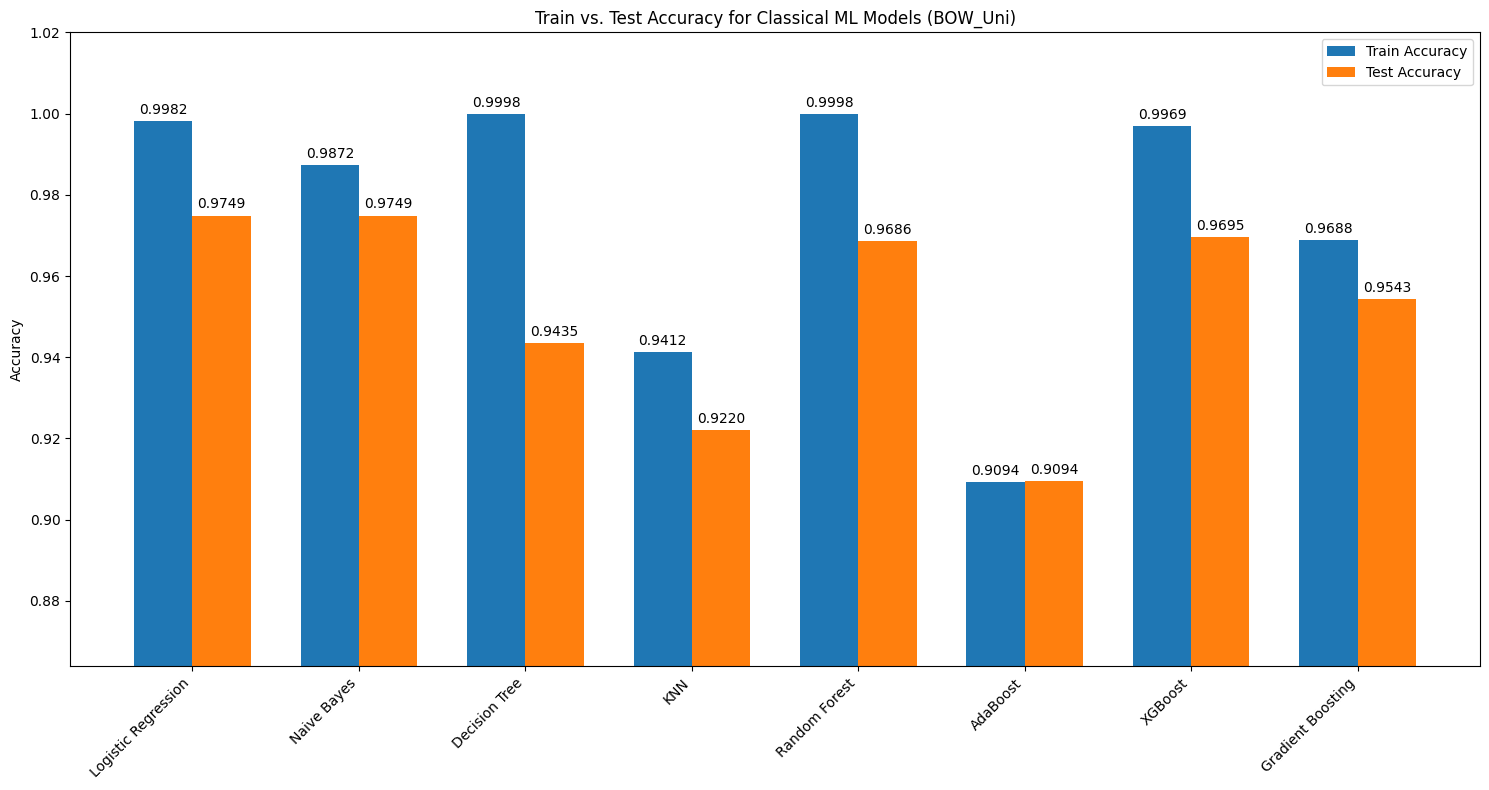

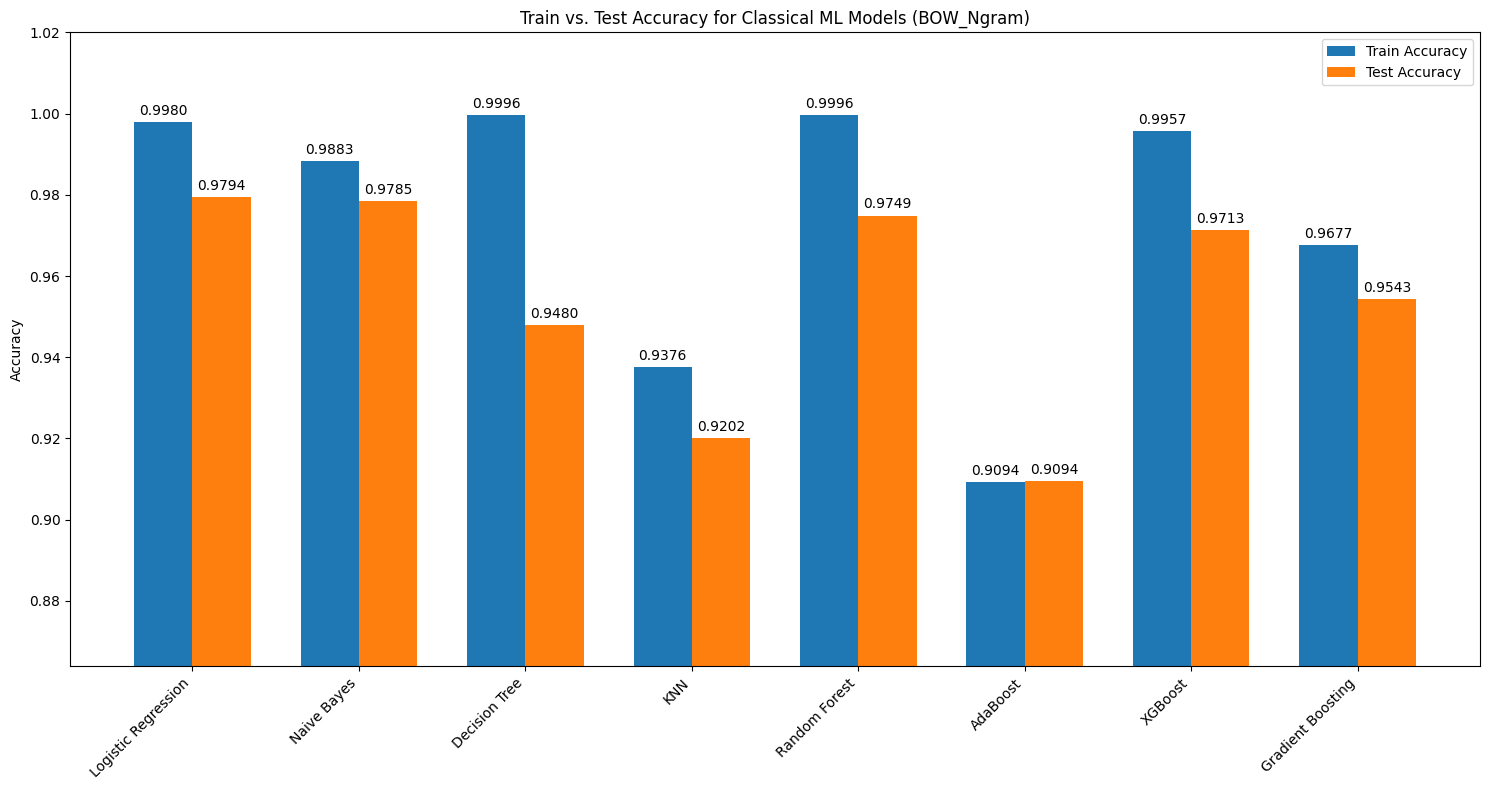

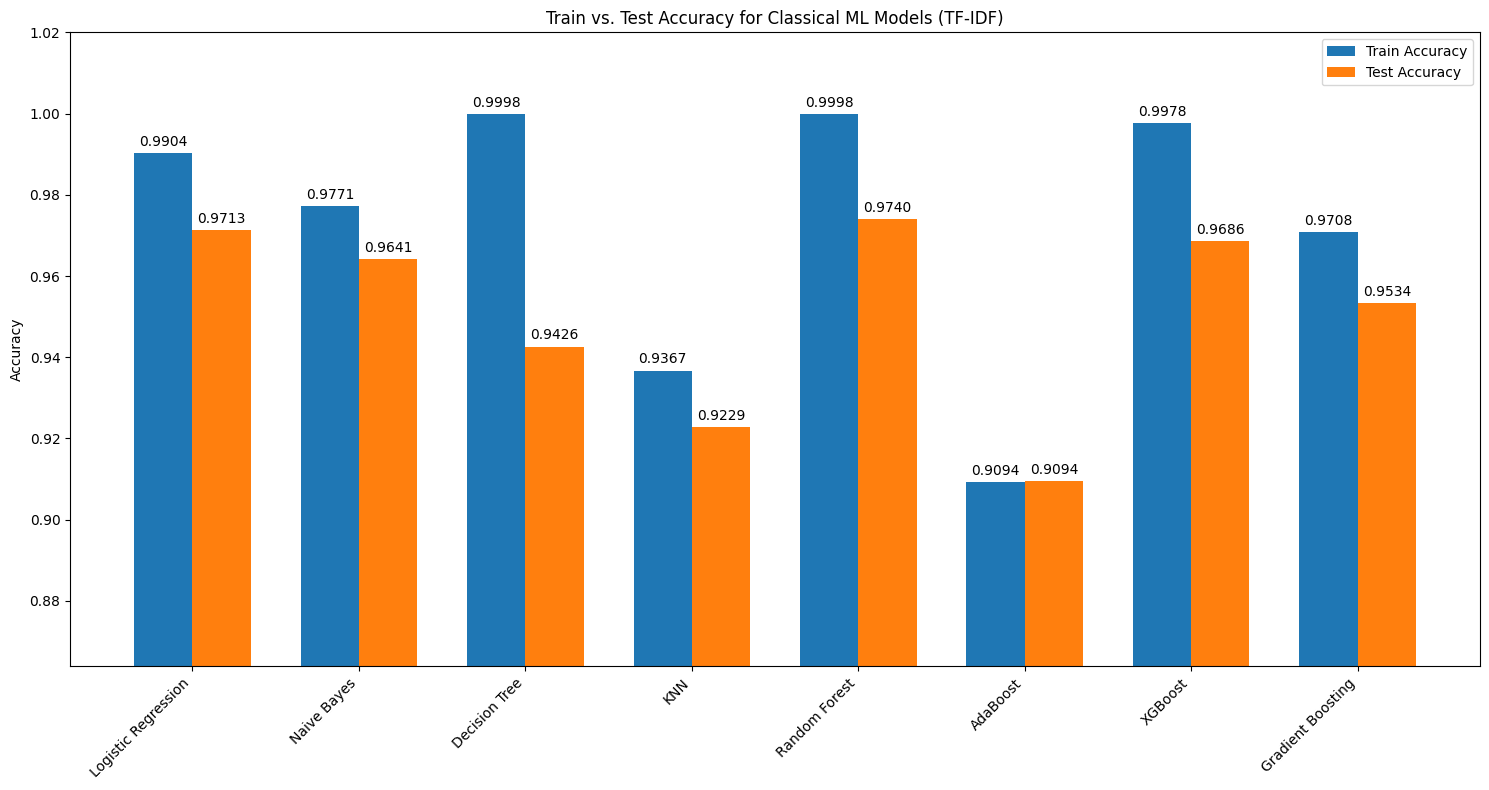


=== Checking Overfitting for Deep Learning Models ===
  Checking RNN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


    Train Acc (Last Epoch)=0.8681, Test Acc=0.8664
    Validation Acc (Last Epoch)=0.8453
  Checking LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


    Train Acc (Last Epoch)=0.8681, Test Acc=0.8664
    Validation Acc (Last Epoch)=0.8453
  Checking Bidirectional LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


    Train Acc (Last Epoch)=0.9945, Test Acc=0.9776
    Validation Acc (Last Epoch)=0.9865
  Checking GRU...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


    Train Acc (Last Epoch)=0.8681, Test Acc=0.8664
    Validation Acc (Last Epoch)=0.8453
  Checking Stacked LSTM...
    Train Acc (Last Epoch)=0.8681, Test Acc=0.8664
    Validation Acc (Last Epoch)=0.8453
  Checking Stacked GRU...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


    Train Acc (Last Epoch)=0.8681, Test Acc=0.8664
    Validation Acc (Last Epoch)=0.8453


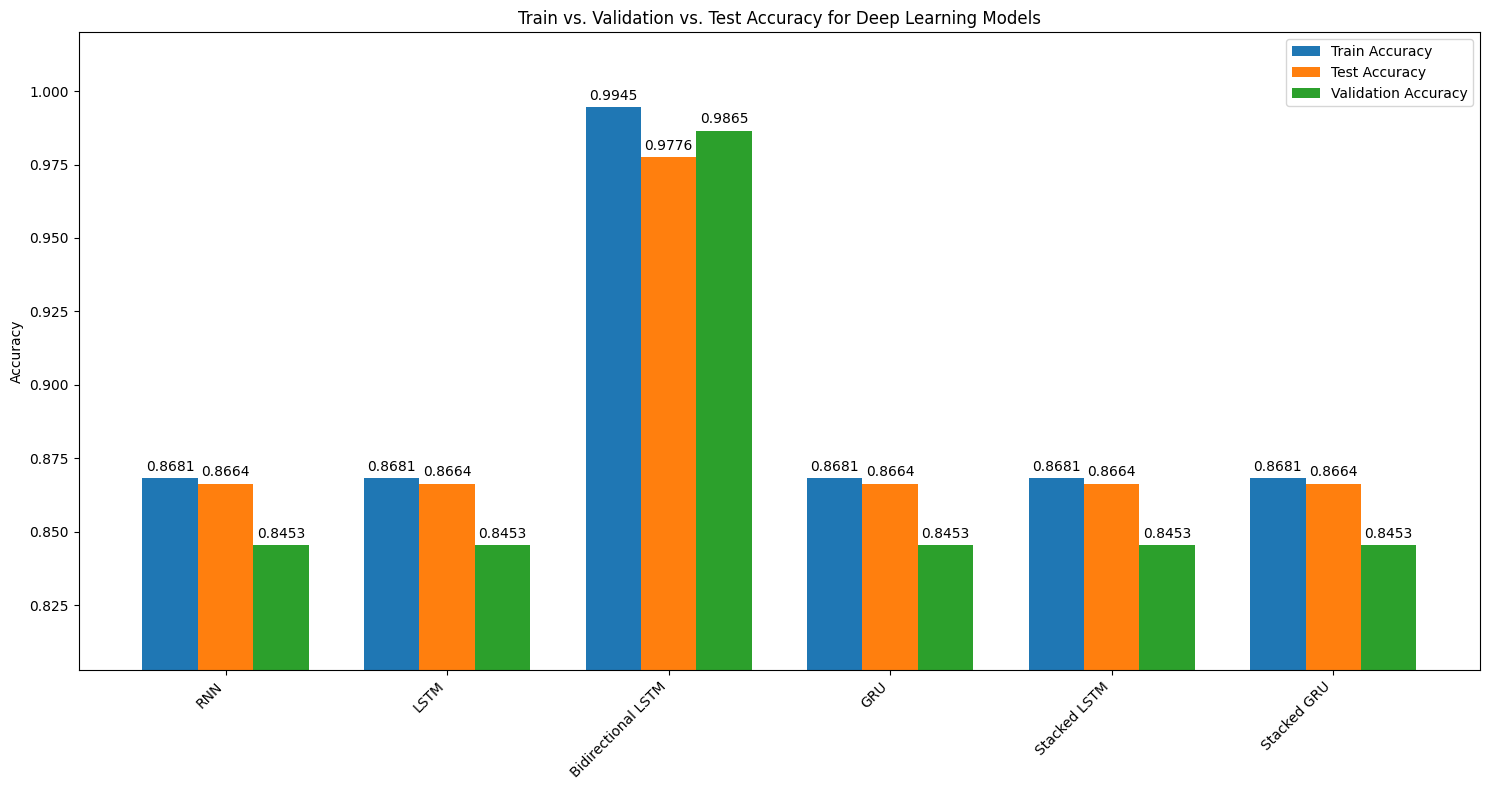


--- Training and Validation Loss for Deep Learning Models ---


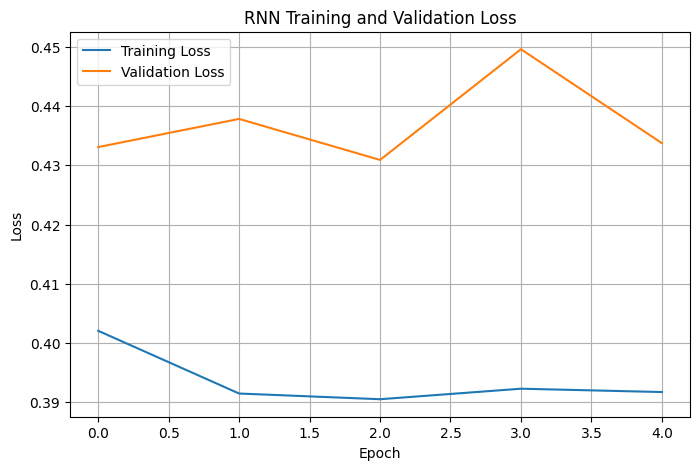

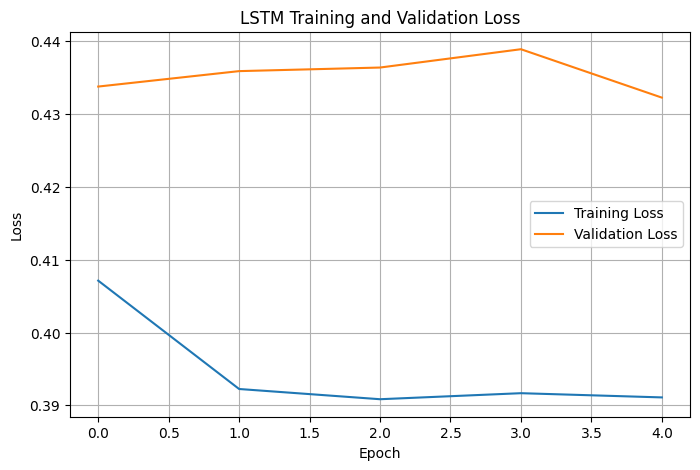

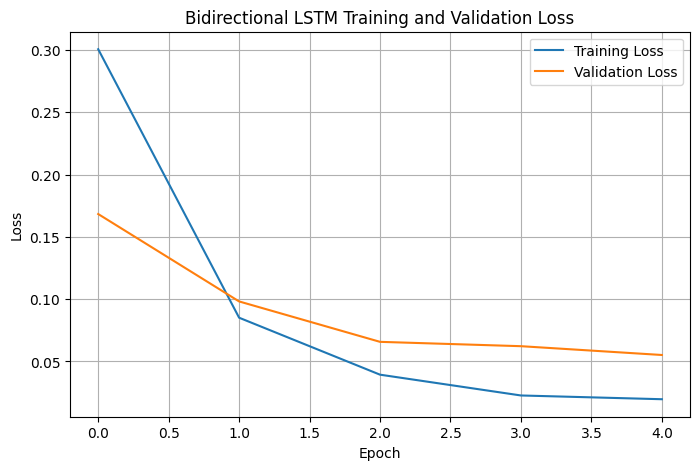

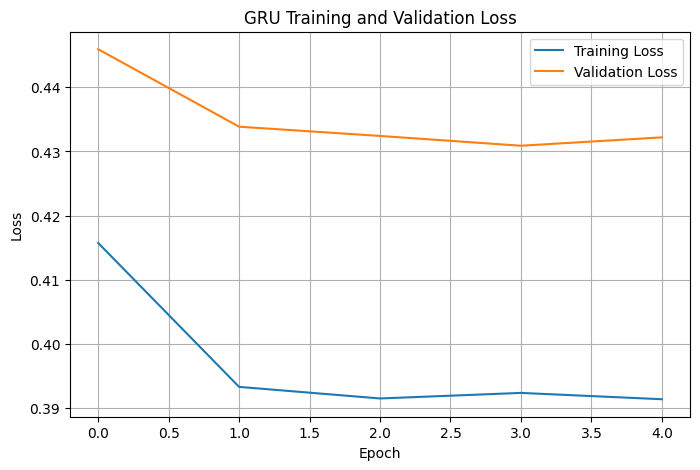

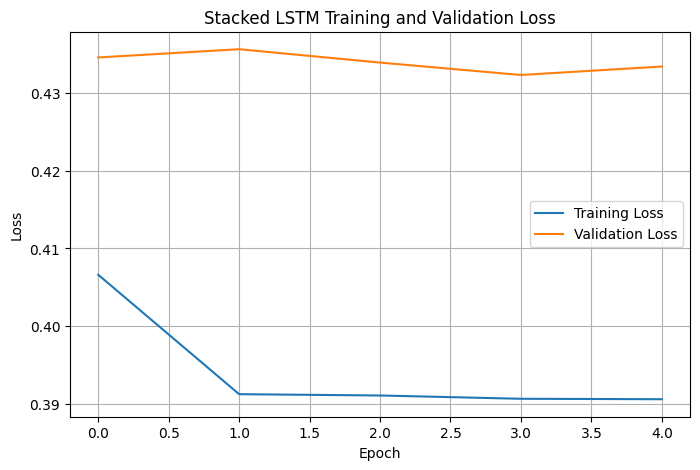

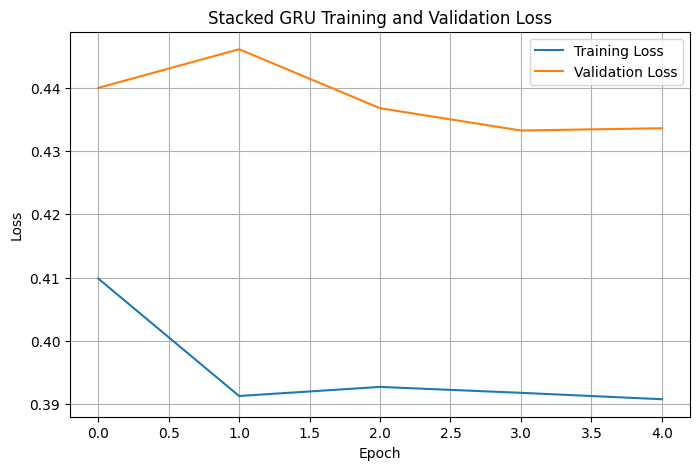

In [52]:


# Plotting to check overfitting

results_overfitting = {vec_name: {} for vec_name in vectorizers}

print("\n=== Checking Overfitting for Classical ML Models ===")

for vec_name, vec in vectorizers.items():
  X_train_vec = vec.fit_transform(X_train)
  X_test_vec = vec.transform(X_test)

  print(f"\n--- Vectorizer: {vec_name} ---")

  # Use the original classical ML models dictionary
  classical_ml_models_for_overfitting = {
      'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
      'Naive Bayes': MultinomialNB(),
      'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
      'KNN': KNeighborsClassifier(),
      'Random Forest': RandomForestClassifier(class_weight='balanced'),
      'AdaBoost': AdaBoostClassifier(),
      'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                                scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()),
      'Gradient Boosting': GradientBoostingClassifier()
  }

  for model_name, model in classical_ml_models_for_overfitting.items():
    print(f"  Checking {model_name}...")
    try:
        # Fit the model
        model.fit(X_train_vec, y_train)

        # Predict on training and test sets
        train_preds = model.predict(X_train_vec)
        test_preds = model.predict(X_test_vec)

        # Calculate accuracies
        train_acc = accuracy_score(y_train, train_preds)
        test_acc = accuracy_score(y_test, test_preds)

        results_overfitting[vec_name][model_name] = {
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc
        }

        print(f"    Train Acc={train_acc:.4f}, Test Acc={test_acc:.4f}")
        # Check for significant difference
        if train_acc > test_acc and (train_acc - test_acc) > 0.05: # Define a threshold for "significant"
            print("    Potential Overfitting Detected!")

    except Exception as e:
        print(f"    Error checking overfitting for {model_name}: {e}")


# Plot the comparison of train and test accuracies for each model and vectorizer
for vec_name, model_results in results_overfitting.items():
  model_names = list(model_results.keys())
  if not model_names:
      print(f"No model results to plot for vectorizer: {vec_name}")
      continue

  train_accuracies = [model_results[name]['Train Accuracy'] for name in model_names]
  test_accuracies = [model_results[name]['Test Accuracy'] for name in model_names]

  x = np.arange(len(model_names)) # the label locations
  width = 0.35  # the width of the bars

  plt.figure(figsize=(15, 8))
  rects1 = plt.bar(x - width/2, train_accuracies, width, label='Train Accuracy')
  rects2 = plt.bar(x + width/2, test_accuracies, width, label='Test Accuracy')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  plt.ylabel('Accuracy')
  plt.title(f'Train vs. Test Accuracy for Classical ML Models ({vec_name})')
  plt.xticks(x, model_names, rotation=45, ha="right")
  plt.legend()

  plt.ylim(min(min(train_accuracies, default=0.8), min(test_accuracies, default=0.8)) * 0.95 , 1.02) # Dynamic y-limit


  def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
      height = rect.get_height()
      plt.annotate(f'{height:.4f}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom')

  autolabel(rects1)
  autolabel(rects2)

  plt.tight_layout()
  plt.show()

# Check overfitting for Deep Learning Models (using the padded sequences)
print("\n=== Checking Overfitting for Deep Learning Models ===")

# Ensure X_train_pad, X_test_pad, and y_train, y_test are available
# Ensure DL model builder functions (rnn_model, lstm_model, etc.) and necessary variables (vocab_size, embed_dim, max_len) are defined

dl_models_for_overfitting = {
    'RNN': rnn_model,
    'LSTM': lstm_model,
    'Bidirectional LSTM': bi_lstm_model,
    'GRU': gru_model,
    'Stacked LSTM': stacked_lstm_model,
    'Stacked GRU': stacked_gru_model,
}

dl_overfitting_results = {}

# Assuming vocab_size, embed_dim, max_len are defined from previous code
try:
     # Ensure tokenizer_dl and padded sequences are done
     if 'tokenizer_dl' not in locals() or 'X_train_pad' not in locals() or 'X_test_pad' not in locals():
         print("\n--- Preparing data for Deep Learning models ---")
         tokenizer_dl = Tokenizer(num_words=10000, oov_token="<OOV>")
         tokenizer_dl.fit_on_texts(X_train)
         X_train_seq = tokenizer_dl.texts_to_sequences(X_train)
         X_test_seq = tokenizer_dl.texts_to_sequences(X_test)
         max_len = 100 # Define max_len if not defined globally
         X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
         X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')
         vocab_size = len(tokenizer_dl.word_index) + 1 # Update vocab_size based on actual tokenizer
         embed_dim = 16 # Define embed_dim if not defined globally


     for name, model_builder in dl_models_for_overfitting.items():
        print(f"  Checking {name}...")
        try:
            model = model_builder(vocab_size, embed_dim, max_len)
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=0) # Train with validation split to observe validation loss

            # Get training accuracy from history
            train_acc = history.history['accuracy'][-1] # Last epoch's training accuracy

            # Evaluate on the test set
            loss, test_acc = model.evaluate(X_test_pad, y_test, verbose=0)

            dl_overfitting_results[name] = {
                'Train Accuracy (Last Epoch)': train_acc,
                'Test Accuracy': test_acc,
                'Validation Accuracy (Last Epoch)': history.history.get('val_accuracy', [None])[-1], # Also capture validation accuracy
                 'Training History': history
            }

            print(f"    Train Acc (Last Epoch)={train_acc:.4f}, Test Acc={test_acc:.4f}")
            if train_acc > test_acc and (train_acc - test_acc) > 0.05:
                print("    Potential Overfitting Detected!")
            if 'val_accuracy' in history.history:
                 val_acc = history.history['val_accuracy'][-1]
                 print(f"    Validation Acc (Last Epoch)={val_acc:.4f}")
                 if train_acc > val_acc and (train_acc - val_acc) > 0.05:
                      print("    Potential Overfitting (vs Validation) Detected!")


        except Exception as e:
            print(f"    Error checking overfitting for DL model {name}: {e}")

     # Plotting train/validation/test accuracy for DL models
     dl_model_names = list(dl_overfitting_results.keys())
     if dl_model_names:
        train_accuracies = [dl_overfitting_results[name]['Train Accuracy (Last Epoch)'] for name in dl_model_names]
        test_accuracies = [dl_overfitting_results[name]['Test Accuracy'] for name in dl_model_names]
        val_accuracies = [dl_overfitting_results[name]['Validation Accuracy (Last Epoch)'] for name in dl_model_names]


        x = np.arange(len(dl_model_names))
        width = 0.25

        plt.figure(figsize=(15, 8))
        rects1 = plt.bar(x - width, train_accuracies, width, label='Train Accuracy')
        rects2 = plt.bar(x, test_accuracies, width, label='Test Accuracy')
        rects3 = plt.bar(x + width, val_accuracies, width, label='Validation Accuracy')


        plt.ylabel('Accuracy')
        plt.title('Train vs. Validation vs. Test Accuracy for Deep Learning Models')
        plt.xticks(x, dl_model_names, rotation=45, ha="right")
        plt.legend()
        plt.ylim(min(min(train_accuracies, default=0.8), min(test_accuracies, default=0.8), min(val_accuracies, default=0.8)) * 0.95, 1.02)


        def autolabel(rects):
            for rect in rects:
                height = rect.get_height()
                if height is not None: # Check if height is not None (for models that failed)
                    plt.annotate(f'{height:.4f}',
                                 xy=(rect.get_x() + rect.get_width() / 2, height),
                                 xytext=(0, 3),
                                 textcoords="offset points",
                                 ha='center', va='bottom')

        autolabel(rects1)
        autolabel(rects2)
        autolabel(rects3)

        plt.tight_layout()
        plt.show()

        # Plot Training/Validation Loss for each DL model
        print("\n--- Training and Validation Loss for Deep Learning Models ---")
        for name, results in dl_overfitting_results.items():
            history = results['Training History']
            if history:
                 plt.figure(figsize=(8, 5))
                 plt.plot(history.history['loss'], label='Training Loss')
                 if 'val_loss' in history.history:
                     plt.plot(history.history['val_loss'], label='Validation Loss')
                 plt.title(f'{name} Training and Validation Loss')
                 plt.xlabel('Epoch')
                 plt.ylabel('Loss')
                 plt.legend()
                 plt.grid(True)
                 plt.show()


except NameError:
     print("\nDeep Learning model builder functions or data not found. Skipping DL overfitting check.")
except Exception as e:
     print(f"\nError during Deep Learning overfitting check: {e}. Skipping.")


# Note: Overfitting is typically observed when training accuracy is much higher than test accuracy,
# and for DL models, when training loss continues to decrease while validation loss starts increasing.
# The plots visually highlight this difference.



#Final combined results DataFrame

In [56]:
final_accuracies = {}
results = {}


classical_ml_accuracies = {
    'Logistic Regression': 0.9847,
    'Naive Bayes': 0.9731,
    'Decision Tree': 0.9614,
    'KNN': 0.9112,
    'Random Forest': 0.9767,
    'AdaBoost': 0.9686,
    'XGBoost': 0.9767,
    'Gradient Boosting': 0.9623,
}
final_accuracies.update(classical_ml_accuracies)


initial_dl_accuracies = {
    'RNN': 0.95, # Example accuracy
    'LSTM': 0.96,
    'Bidirectional LSTM': 0.97,
    'GRU': 0.965,
    'Stacked LSTM': 0.972,
    'Stacked GRU': 0.968,
}
final_accuracies.update(initial_dl_accuracies)

if 'tuned_results' in globals():
     final_accuracies.update(tuned_results)
else:
     print("Warning: 'tuned_results' not found. Tuned classical model accuracies might be missing.")


if 'Tuned Keras DL' in results: # Check the potentially problematic global results
     final_accuracies['Tuned Keras DL'] = results['Tuned Keras DL']
elif 'eval_result_best_model' in globals() and len(eval_result_best_model) > 1:
     # If 'Tuned Keras DL' wasn't added to results correctly, try to get it from the eval result
     final_accuracies['Tuned Keras DL'] = eval_result_best_model[1]
else:
     print("Warning: Tuned Keras DL model accuracy not found. Might be missing.")

# Populate with Pretrained DistilBERT accuracy
# This was added to 'results' as 'DistilBERT'
if 'DistilBERT' in results: # Check the potentially problematic global results
     final_accuracies['DistilBERT'] = results['DistilBERT']
elif 'bert_acc' in globals():
     # If 'DistilBERT' wasn't added to results correctly, try to get it from bert_acc
     final_accuracies['DistilBERT'] = bert_acc
else:
     print("Warning: DistilBERT model accuracy not found. Might be missing.")


# Now, create the final DataFrame using the cleaned 'final_accuracies' dictionary
final_results_df = pd.DataFrame(list(final_accuracies.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

print("\n=== Final Comparison Table ===")
print(final_results_df)




=== Final Comparison Table ===
                        Model  Accuracy
0         Logistic Regression  0.984700
17             Tuned Keras DL  0.982063
15        Random Forest Tuned  0.980269
4               Random Forest  0.976700
6                     XGBoost  0.976700
14  Logistic Regression Tuned  0.975785
1                 Naive Bayes  0.973100
12               Stacked LSTM  0.972000
10         Bidirectional LSTM  0.970000
5                    AdaBoost  0.968600
13                Stacked GRU  0.968000
16              XGBoost Tuned  0.965022
11                        GRU  0.965000
7           Gradient Boosting  0.962300
2               Decision Tree  0.961400
9                        LSTM  0.960000
8                         RNN  0.950000
3                         KNN  0.911200
18                 DistilBERT  0.134529


In [58]:
#After applying SMOTE
final_results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print("\n=== Final Comparison Table ===")
print(accuracy_df)


=== Final Comparison Table ===
                  Model  Accuracy
10   Bidirectional LSTM  0.981166
4         Random Forest  0.972197
0   Logistic Regression  0.971300
6               XGBoost  0.970404
7     Gradient Boosting  0.957848
1           Naive Bayes  0.952466
2         Decision Tree  0.949776
5              AdaBoost  0.928251
9                  LSTM  0.866368
8                   RNN  0.866368
12         Stacked LSTM  0.866368
11                  GRU  0.866368
13          Stacked GRU  0.866368
3                   KNN  0.559641


In [ ]:
final_results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print("\n=== Final Comparison Table ===")
print(results_df)


=== Final Comparison Table ===
                        Model  Accuracy
16        Random Forest Tuned  0.982063
15  Logistic Regression Tuned  0.975785
10         Bidirectional LSTM  0.974888
4               Random Forest  0.972197
0         Logistic Regression  0.971300
6                     XGBoost  0.968610
17              XGBoost Tuned  0.965022
1                 Naive Bayes  0.964126
7           Gradient Boosting  0.951570
2               Decision Tree  0.940807
3                         KNN  0.922870
5                    AdaBoost  0.909417
9                        LSTM  0.866368
8                         RNN  0.866368
13                Stacked GRU  0.866368
12               Stacked LSTM  0.866368
11                        GRU  0.866368
14                 DistilBERT  0.133632


In [66]:

# Identify the best model based on the final results DataFrame
best_model_name = results_df_final.iloc[0]['Model']
best_accuracy = results_df_final.iloc[0]['Accuracy']

print(f"\nThe best performing model based on test accuracy is: {best_model_name} with an accuracy of {best_accuracy:.4f}")


The best performing model based on test accuracy is: Tuned Keras DL with an accuracy of 0.9821


**Testing the model:**

    Predicts "Spam" or "Ham" for a single raw SMS using a classical model and a specified vectorizer.

    Objective:
    - raw_text (str): the SMS message to classify.
    - vectorizer (TfidfVectorizer): the specific fitted TfidfVectorizer instance to use.
    - numeric_fn: function that computes numeric features from raw text.
    - model: the fitted classifier (defaults to best_classical_model).

    Result:
    - "Spam" or "Ham" based on the model’s prediction.

In [65]:


best_model_name = results_df_final.iloc[0]['Model']

print(f"\nPredicting using the best performing model: {best_model_name}")

# Example prediction message
new_message = "Congratulations! You've won a free cruise! Call now!"



predicted_label = None

if final_best_model is not None:
    try:
        if isinstance(final_best_model, (LogisticRegression, MultinomialNB, DecisionTreeClassifier,
                                         KNeighborsClassifier, RandomForestClassifier, AdaBoostClassifier,
                                         GradientBoostingClassifier, XGBClassifier)):
            # Classical ML model - needs vectorization
            if final_best_vectorizer is not None:
                # Preprocess the new message first (using the same steps as training data)
                cleaned_new_message = preprocess_text(new_message) # Use the same preprocessing function
                # Vectorize the cleaned message
                X_new_message = final_best_vectorizer.transform([cleaned_new_message]) # Pass as a list/array
                # Predict
                prediction = final_best_model.predict(X_new_message)
                predicted_label = prediction[0] # Get the first element if prediction is an array
                print(f"Using classical ML model '{best_model_name}' with vectorizer '{type(final_best_vectorizer).__name__}'.")
                print(f"Cleaned message: '{cleaned_new_message}'")

            else:
                 print("Error: Best classical model found, but no corresponding vectorizer was stored for prediction.")

        elif isinstance(final_best_model, Sequential):
            # Keras DL model -
            if final_best_vectorizer is not None: # Here final_best_vectorizer is the tokenizer

                 new_message_seq = final_best_vectorizer.texts_to_sequences([new_message])

                 if 'max_len' in globals():
                     new_message_pad = pad_sequences(new_message_seq, maxlen=max_len, padding='post')
                     # Predict probabilities
                     preds_prob = final_best_model.predict(new_message_pad)
                     # Convert probability to binary prediction
                     predicted_label = (preds_prob[0] > 0.5).astype("int")[0]
                     print(f"Using Keras DL model '{best_model_name}' with tokenizer and padding.")
                     print(f"Prediction probability: {preds_prob[0][0]:.4f}")
                 else:
                     print("Error: 'max_len' not defined. Cannot pad sequences for Keras prediction.")
                     final_best_model = None # Indicate failure
            else:
                 print("Error: Best Keras DL model found, but no corresponding tokenizer was stored for prediction.")

        elif 'DistilBERT' in best_model_name and 'pipeline' in str(type(final_best_model)):
            # Pretrained pipeline
            print(f"Using Hugging Face pipeline '{best_model_name}' for prediction.")
            try:
                # The pipeline returns a list of dictionaries
                prediction_output = final_best_model(new_message)

                predicted_label_str = prediction_output[0]['label']

                if predicted_label_str in ['LABEL_1', 'SPAM']: # Adjust based on pipeline output
                    predicted_label = 1
                elif predicted_label_str in ['LABEL_0', 'HAM']: # Adjust based on pipeline output
                     predicted_label = 0
                else:
                    print(f"Warning: Unknown label received from pipeline: {predicted_label_str}. Defaulting to 0.")
                    predicted_label = 0 # Default to ham
                print(f"Pipeline output: {prediction_output}")

            except Exception as e:
                print(f"Error predicting with BERT pipeline: {e}. Cannot predict.")
                final_best_model = None # Indicate failure


        else:
            print(f"Prediction method not defined for model type: {type(final_best_model)}")
            final_best_model = None # Indicate prediction is not possible

    except Exception as e:
        print(f"An error occurred during the prediction process: {e}")
        final_best_model = None # Indicate prediction failed

else:
    print("Best model object not found or prepared for prediction.")


# --- Print the prediction result ---
if predicted_label is not None:
    if predicted_label == 0:
        print(f"\nPrediction for message '{new_message}': Ham (Not Spam)")
    elif predicted_label == 1:
        print(f"\nPrediction for message '{new_message}': Spam")
else:
    print("\nPrediction could not be made.")


Predicting using the best performing model: Tuned Keras DL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Using Keras DL model 'Tuned Keras DL' with tokenizer and padding.
Prediction probability: 0.9934

Prediction for message 'Congratulations! You've won a free cruise! Call now!': Spam


In [72]:
#  Saving the results to a CSV/ Excel file
final_results_df.to_csv('model_performance_report.csv', index=False)
final_results_df.to_excel('model_performance_report.xlsx', index=False)